# 1 Data preparation

In [1]:
#Import library
#!pip install datasist
#!pip install qgrid
import pandas as pd
import numpy as np

#Import library for data exploration and cleaning
# import datasist as ds

#Import library for interactive table
# import qgrid #View full dataset

#Import library for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

#View max columns or rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)
pd.set_option('max_info_rows', 20)
pd.set_option('max_colwidth', 50)
# pd.reset_option('max_columns')
#pd.reset_option('max_rows')


In [2]:
#Select dataset
sel = 'A'

#Read data
df = pd.read_csv('setBC/df_pivot_time_Set' + sel + '.csv', header=[0,1], index_col=[0,1], skipinitialspace=True)

#Flatten Multi-index
# df.columns.to_flat_index() 
df.columns = df.columns.get_level_values(1) 

#Reset index
df = df.reset_index()

In [3]:
#View top few rows
df.head()

Parameter,Patient,Time,ALP,ALT,AST,Age,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,DiasABP,FiO2,GCS,Gender,Glucose,HCO3,HCT,HR,Height,ICUType,K,Lactate,MAP,MechVent,Mg,NIDiasABP,NIMAP,NISysABP,Na,PaCO2,PaO2,Platelets,RecordID,RespRate,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,Weight,pH
0,132539,00:00,NaN,NaN,NaN,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,-1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,132539.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN
1,132539,00:07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.0,92.33,147.0,NaN,NaN,NaN,NaN,NaN,19.0,NaN,NaN,35.1,NaN,NaN,900.0,NaN,NaN,NaN
2,132539,00:37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.0,91.00,157.0,NaN,NaN,NaN,NaN,NaN,19.0,NaN,NaN,35.6,NaN,NaN,60.0,NaN,NaN,NaN
3,132539,01:37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,87.00,137.0,NaN,NaN,NaN,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN,30.0,NaN,NaN,NaN
4,132539,02:37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,75.67,123.0,NaN,NaN,NaN,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN,170.0,NaN,NaN,NaN


## 1.1 Data Exploration

In [4]:
#Explore data and check for outliers
df.describe()

Parameter,Patient,ALP,ALT,AST,Age,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,DiasABP,FiO2,GCS,Gender,Glucose,HCO3,HCT,HR,Height,ICUType,K,Lactate,MAP,MechVent,Mg,NIDiasABP,NIMAP,NISysABP,Na,PaCO2,PaO2,Platelets,RecordID,RespRate,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,Weight,pH
count,299264.000000,3090.000000,3175.000000,3180.000000,4000.000000,2355.000000,13907.000000,3190.000000,315.000000,13974.000000,145567.000000,32390.000000,61563.000000,4000.000000,13011.000000,13601.000000,18257.000000,228538.000000,4000.000000,4000.000000,14430.000000,8024.000000,143896.000000,31144.0,13585.000000,98210.000000,96871.000000,98331.000000,13560.000000,23293.000000,23268.000000,14095.000000,4000.000000,55043.000000,8185.000000,145650.000000,86202.000000,435.000000,2123.000000,135358.000000,12900.000000,129165.000000,24355.000000
mean,137611.362259,116.741262,394.611496,506.533176,64.247500,2.922357,27.416402,2.909389,156.517460,1.505381,59.290512,0.545201,11.398714,0.560750,141.467950,23.115734,30.679594,87.517442,88.919475,2.760000,4.135793,2.924779,79.774518,1.0,2.027858,57.953864,76.780450,118.594024,139.074742,40.474748,150.415269,190.804498,137605.122000,19.723880,96.637068,118.697899,37.025690,7.151264,1.200008,119.398331,12.669728,83.386615,7.489200
std,2918.552296,133.938449,1200.528654,1516.873140,17.560946,0.651550,23.398754,5.905646,46.068097,1.636425,13.318196,0.189849,3.973416,0.497867,67.479817,4.710793,5.011982,18.405037,86.531203,1.002572,0.705110,2.579302,16.961585,0.0,0.422110,15.547783,15.636403,23.260227,5.185329,9.126217,89.300793,106.389848,2923.608886,5.552548,3.400295,25.016241,1.484978,9.767399,2.716008,175.184997,7.642871,25.047833,8.244106
min,132539.000000,12.000000,1.000000,4.000000,15.000000,1.000000,0.000000,0.100000,28.000000,0.100000,0.000000,0.210000,3.000000,-1.000000,10.000000,5.000000,9.000000,0.000000,-1.000000,1.000000,1.800000,0.300000,0.000000,1.0,0.600000,0.000000,0.000000,0.000000,98.000000,0.300000,0.000000,6.000000,132539.000000,0.000000,26.000000,0.000000,-17.800000,0.300000,0.010000,0.000000,0.100000,-1.000000,1.000000
25%,135086.000000,59.000000,20.000000,31.000000,52.750000,2.500000,13.000000,0.500000,123.000000,0.700000,51.000000,0.400000,8.000000,0.000000,105.000000,20.000000,27.300000,75.000000,-1.000000,2.000000,3.700000,1.400000,69.000000,1.0,1.800000,47.000000,66.000000,102.000000,136.000000,35.000000,90.000000,119.000000,135075.750000,16.000000,96.000000,102.000000,36.600000,0.900000,0.060000,36.000000,8.300000,67.000000,7.330000
50%,137624.000000,82.000000,43.000000,64.000000,67.000000,2.900000,20.000000,0.900000,152.000000,1.000000,58.000000,0.500000,13.000000,1.000000,127.000000,23.000000,30.300000,86.000000,152.400000,3.000000,4.100000,2.100000,77.000000,1.0,2.000000,56.000000,75.000000,116.000000,139.000000,39.000000,121.000000,172.000000,137592.500000,19.000000,97.000000,116.000000,37.100000,2.600000,0.200000,70.000000,11.400000,80.600000,7.380000
75%,140104.000000,122.000000,162.000000,209.000000,78.000000,3.400000,33.000000,2.300000,188.000000,1.500000,67.000000,0.600000,15.000000,1.000000,157.000000,26.000000,33.500000,99.000000,170.200000,4.000000,4.500000,3.400000,88.000000,1.0,2.200000,67.000000,86.000000,133.000000,142.000000,45.000000,176.000000,238.000000,140100.250000,23.000000,98.000000,133.000000,37.600000,10.000000,1.020000,140.000000,15.400000,96.000000,7.430000
max,142673.000000,2205.000000,11470.000000,18430.000000,90.000000,5.300000,197.000000,47.700000,330.000000,22.100000,268.000000,1.000000,15.000000,1.000000,1143.000000,50.000000,61.800000,300.000000,431.800000,4.000000,22.900000,29.300000,300.000000,1.0,9.900000,201.000000,209.000000,296.000000,177.000000,100.000000,500.000000,1047.000000,142673.000000,98.000000,100.000000,295.000000,42.100000,49.200000,24.910000,11000.000000,187.500000,300.000000,735.000000


In [5]:
#Read outcome file as csv
df_Y = pd.DataFrame(pd.read_csv('setBC/Outcomes-' + sel.lower() + '.txt'))

#Read top few rows of data
df_Y.head()

,RecordID,SAPS-I,SOFA,Length_of_stay,Survival,In-hospital_death
0,132539,6,1,5,-1,0
1,132540,16,8,8,-1,0
2,132541,21,11,19,-1,0
3,132543,7,1,9,575,0
4,132545,17,2,4,918,0


In [6]:
#Merge outcome with variables #Combine df_Y and df_group
df_all = pd.merge(df, df_Y, left_on='Patient', right_on = 'RecordID')

df_all= df_all.drop(['RecordID_x', 'RecordID_y'], axis=1)

#Read top few rows of data
df_all.head()

,Patient,Time,ALP,ALT,AST,Age,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,DiasABP,FiO2,GCS,Gender,Glucose,HCO3,HCT,HR,Height,ICUType,K,Lactate,MAP,MechVent,Mg,NIDiasABP,NIMAP,NISysABP,Na,PaCO2,PaO2,Platelets,RespRate,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,Weight,pH,SAPS-I,SOFA,Length_of_stay,Survival,In-hospital_death
0,132539,00:00,NaN,NaN,NaN,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,-1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,6,1,5,-1,0
1,132539,00:07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.0,92.33,147.0,NaN,NaN,NaN,NaN,19.0,NaN,NaN,35.1,NaN,NaN,900.0,NaN,NaN,NaN,6,1,5,-1,0
2,132539,00:37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.0,91.00,157.0,NaN,NaN,NaN,NaN,19.0,NaN,NaN,35.6,NaN,NaN,60.0,NaN,NaN,NaN,6,1,5,-1,0
3,132539,01:37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,87.00,137.0,NaN,NaN,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN,30.0,NaN,NaN,NaN,6,1,5,-1,0
4,132539,02:37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,75.67,123.0,NaN,NaN,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN,170.0,NaN,NaN,NaN,6,1,5,-1,0


## 1.2 Imputation

### 1.2.1 Gender

In [7]:
#Check gender that is -1
df_all[df_all['Gender'] == -1]

,Patient,Time,ALP,ALT,AST,Age,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,DiasABP,FiO2,GCS,Gender,Glucose,HCO3,HCT,HR,Height,ICUType,K,Lactate,MAP,MechVent,Mg,NIDiasABP,NIMAP,NISysABP,Na,PaCO2,PaO2,Platelets,RespRate,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,Weight,pH,SAPS-I,SOFA,Length_of_stay,Survival,In-hospital_death
94717,135757,00:00,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,180.3,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.0,NaN,17,16,2,1,1
142044,137392,00:00,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,-1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,-1,-1,6,-1,0
263883,141486,00:00,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,-1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.7,NaN,15,1,11,234,0


In [8]:
#Check if patient has any record of gender
#Match patient number to search results of gender -1. Obtain Patient and Gender fields to summarize
# df[df['Patient'].isin(df[df['Gender'] == -1]['Patient'])][['Patient', 'Gender']].dropna() #.groupby('Patient').nunique()

In [9]:
#Remove patients with invalid gender
# df = df[df[('Value', 'Gender')] != -1]
df_all = df_all[~df_all['Patient'].isin(df_all['Patient'][df_all['Gender'] == -1])]

In [10]:
#Function to impute gender
# def fill_gender(df):
#     from sklearn.linear_model import LogisticRegression as LR

#     df = df.reset_index()

#     #Find missing gender
#     df_gender = df.loc[:,(['Value'],['Gender', 'Age', 'Height', 'Weight', 'pH', 'NIDiasABP', 'Creatinine'])]
#     df_gender = pd.concat([df['Patient'],df_gender],axis = 1)
#     df_gender = df_gender.groupby('Patient').mean()

#     #Train LR model to fill wrong gender value
#     lr = LR()
#     x = df_gender[df_gender['Value','Gender'] != -1].iloc[:,[0,1,3,4,5,6]].fillna(0)
#     y = df_gender[df_gender['Value','Gender'] != -1]['Value','Gender']
#     lr = lr.fit(x,y)
#     lr_gender = lr.predict(df_gender[df_gender['Value','Gender'] == -1].iloc[:,[0,1,3,4,5,6]].fillna(0))
#     i = 0
    
#     for idx in df_gender[df_gender['Value','Gender'] == -1].index:
#         index1 = df.loc[(df['Patient']== idx) & (df['Time']=='00:00')].index[0]
#         df.loc[index1,(['Value'],['Gender'])] = lr_gender[i]
#         i +=1
        
#     df.set_index(["Patient","Time"], inplace=True)
    
#     if len(df[df['Value','Gender'] ==-1]) == 0:
#         return df

##Use logistic regression to fill gender
# df = fill_gender(df) 
# df[df['Value','Gender'] ==-1] #No abnormal gender now

##Collapse multi-index columns
# df.columns = df.columns.get_level_values(1) 

##Rename columns
# df.rename(columns = {df.columns[0]: 'Patient', df.columns[1]: 'Time'}, inplace=True)

In [11]:
#View top few rows
df_all.head(10)

,Patient,Time,ALP,ALT,AST,Age,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,DiasABP,FiO2,GCS,Gender,Glucose,HCO3,HCT,HR,Height,ICUType,K,Lactate,MAP,MechVent,Mg,NIDiasABP,NIMAP,NISysABP,Na,PaCO2,PaO2,Platelets,RespRate,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,Weight,pH,SAPS-I,SOFA,Length_of_stay,Survival,In-hospital_death
0,132539,00:00,NaN,NaN,NaN,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,-1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,6,1,5,-1,0
1,132539,00:07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.0,92.33,147.0,NaN,NaN,NaN,NaN,19.0,NaN,NaN,35.1,NaN,NaN,900.0,NaN,NaN,NaN,6,1,5,-1,0
2,132539,00:37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.0,91.00,157.0,NaN,NaN,NaN,NaN,19.0,NaN,NaN,35.6,NaN,NaN,60.0,NaN,NaN,NaN,6,1,5,-1,0
3,132539,01:37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,87.00,137.0,NaN,NaN,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN,30.0,NaN,NaN,NaN,6,1,5,-1,0
4,132539,02:37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,75.67,123.0,NaN,NaN,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN,170.0,NaN,NaN,NaN,6,1,5,-1,0
5,132539,03:08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,1,5,-1,0
6,132539,03:37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,72.67,114.0,NaN,NaN,NaN,NaN,20.0,NaN,NaN,37.8,NaN,NaN,60.0,NaN,NaN,NaN,6,1,5,-1,0
7,132539,04:37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,1,5,-1,0
8,132539,05:37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0,66.67,110.0,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,170.0,NaN,NaN,NaN,6,1,5,-1,0
9,132539,07:37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.0,68.33,107.0,NaN,NaN,NaN,NaN,15.0,NaN,NaN,38.1,NaN,NaN,120.0,NaN,NaN,NaN,6,1,5,-1,0


In [12]:
#Display number of patients
df_all['Patient'].nunique()

3997

### 1.2.2 Height, Weight, Temperature

Filter values that are not within 1.5 times of IQR. Then fill the abnormal value according to the average value among the patients (who have normal record value) of their age and gender.

In [13]:
#Determine outliers that are 1.5*IQR from limits
def stat_cal(col):
    #Obtain statistics
    stat = col.describe()
    
    #Calculate IQR
    stat.loc['range'] = stat.loc['max'] - stat.loc['min'] 
    stat.loc['IQR'] = stat.loc['75%'] - stat.loc['25%'] 
    stat.loc['upper_limit'] = stat.loc['75%'] + 1.5*stat.loc['IQR']
    stat.loc['lower_limit'] = stat.loc['25%'] - 1.5*stat.loc['IQR']

    return stat

In [14]:
def fill_para(df,para_type):
#   df = df.reset_index()

    #Replace -1 and 0 with NaN
    df_all.loc[:,['Height', 'Weight', 'Temp']] = df_all.loc[:,['Height', 'Weight', 'Temp']].replace(-1.0, np.nan)
    df_all.loc[:,['Height', 'Weight', 'Temp']] = df_all.loc[:,['Height', 'Weight', 'Temp']].replace(0, np.nan)
    
    #Obtain column
    if para_type == 'Height':
        col = df.columns.get_loc('Height')
    elif para_type == 'Weight':
        col = df.columns.get_loc('Weight')
    elif para_type == 'Temp':
        col = df.columns.get_loc('Temp')
        df.iloc[:,col] = df.iloc[:,col].apply(lambda x: -x if x<0 else x)
    else: 
        print('Not Applicable')
        return 0
    
    #Calculate statistic value
    para = pd.DataFrame(df[para_type])
    para = para[para[para_type].isna() == False]
    stat = stat_cal(para[para_type])

    #Find the rows with outlier
    bad_list = []
    bad_list.extend(para[para[para_type] > stat.loc['upper_limit']][para_type].tolist())
    bad_list.extend(para[para[para_type] < stat.loc['lower_limit']][para_type].tolist())
    bad_list = list(set(bad_list))
    
    #Remove dataframe
    del stat, para
    
    #Find median parameters of people in this age and this gender
    normal_para = df[df[para_type].apply(lambda x: x not in bad_list)].iloc[:, [5,14,col]]
    te1 = normal_para.columns[0]
    te2 = normal_para.columns[1]
    avg_para = normal_para.groupby([te1, te2]).median()
    
    #Remove dataframe
    del normal_para
    
    #Impute
    avg_para = avg_para.reset_index()
    para_out = df[df[para_type].apply(lambda x: x in bad_list)].iloc[:, [0,col]]
    tmp = df.iloc[:,[0,5,14]].groupby('Patient').median()
    tmp = tmp.reset_index()
    para_out = pd.merge(para_out, tmp, on = ['Patient'], how = 'inner')    
    para_out.columns = ['Patient',para_type, 'Age', 'Gender']
    
    #Remove dataframe
    del tmp
    fill_outpara = pd.merge(para_out, avg_para, on = ['Age','Gender'], how = 'left')
    
    #Remove dataframe
    del para_out, avg_para
    
    #Join dataframe
    join_table = fill_outpara.iloc[:, [0,1,4]]
    
    join_table.columns = [df.columns[0], df.columns[col], ('new_'+ para_type)]
    join_table.iloc[:,-1] = join_table.iloc[:,-1].fillna(join_table.iloc[:,-1].median())

    new_join = pd.merge(df, join_table, on = [df.columns[0], df.columns[col]], how = 'left')
    new_join[('new_'+ para_type)].fillna(new_join[(para_type)], inplace = True)
#     new_join = new_join.drop(new_join.columns[len(new_join.columns)-2],axis = 1)
    
    return new_join

In [15]:
#Impute height
df_all = fill_para(df_all,'Height')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [16]:
#Impute weight
df_all = fill_para(df_all,'Weight')
df_all.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Patient,Time,ALP,ALT,AST,Age,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,DiasABP,FiO2,GCS,Gender,Glucose,HCO3,HCT,HR,Height,ICUType,K,Lactate,MAP,MechVent,Mg,NIDiasABP,NIMAP,NISysABP,Na,PaCO2,PaO2,Platelets,RespRate,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,Weight,pH,SAPS-I,SOFA,Length_of_stay,Survival,In-hospital_death,new_Height,new_Weight
0,132539,00:00,NaN,NaN,NaN,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,1,5,-1,0,NaN,NaN
1,132539,00:07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.0,92.33,147.0,NaN,NaN,NaN,NaN,19.0,NaN,NaN,35.1,NaN,NaN,900.0,NaN,NaN,NaN,6,1,5,-1,0,NaN,NaN
2,132539,00:37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.0,91.00,157.0,NaN,NaN,NaN,NaN,19.0,NaN,NaN,35.6,NaN,NaN,60.0,NaN,NaN,NaN,6,1,5,-1,0,NaN,NaN
3,132539,01:37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,87.00,137.0,NaN,NaN,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN,30.0,NaN,NaN,NaN,6,1,5,-1,0,NaN,NaN
4,132539,02:37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,75.67,123.0,NaN,NaN,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN,170.0,NaN,NaN,NaN,6,1,5,-1,0,NaN,NaN


In [17]:
#Impute temperature
df_all = fill_para(df_all,'Temp')
df_all.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Patient,Time,ALP,ALT,AST,Age,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,DiasABP,FiO2,GCS,Gender,Glucose,HCO3,HCT,HR,Height,ICUType,K,Lactate,MAP,MechVent,Mg,NIDiasABP,NIMAP,NISysABP,Na,PaCO2,PaO2,Platelets,RespRate,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,Weight,pH,SAPS-I,SOFA,Length_of_stay,Survival,In-hospital_death,new_Height,new_Weight,new_Temp
0,132539,00:00,NaN,NaN,NaN,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,1,5,-1,0,NaN,NaN,NaN
1,132539,00:07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.0,92.33,147.0,NaN,NaN,NaN,NaN,19.0,NaN,NaN,35.1,NaN,NaN,900.0,NaN,NaN,NaN,6,1,5,-1,0,NaN,NaN,35.1
2,132539,00:37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.0,91.00,157.0,NaN,NaN,NaN,NaN,19.0,NaN,NaN,35.6,NaN,NaN,60.0,NaN,NaN,NaN,6,1,5,-1,0,NaN,NaN,35.6
3,132539,01:37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,87.00,137.0,NaN,NaN,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN,30.0,NaN,NaN,NaN,6,1,5,-1,0,NaN,NaN,NaN
4,132539,02:37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,75.67,123.0,NaN,NaN,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN,170.0,NaN,NaN,NaN,6,1,5,-1,0,NaN,NaN,NaN


In [18]:
#Check if height is replaced
df_all[df_all['new_Height'] == -1]

,Patient,Time,ALP,ALT,AST,Age,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,DiasABP,FiO2,GCS,Gender,Glucose,HCO3,HCT,HR,Height,ICUType,K,Lactate,MAP,MechVent,Mg,NIDiasABP,NIMAP,NISysABP,Na,PaCO2,PaO2,Platelets,RespRate,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,Weight,pH,SAPS-I,SOFA,Length_of_stay,Survival,In-hospital_death,new_Height,new_Weight,new_Temp


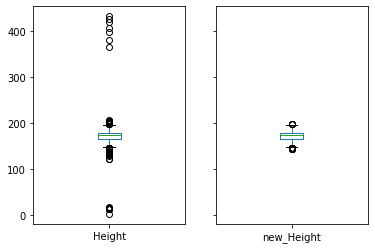

In [19]:
#Plot before and after
fig, ax = plt.subplots(ncols=2, sharey=True)

df_all["Height"].plot(kind="box", ax=ax[0])
df_all["new_Height"].plot(kind="box", ax=ax[1])

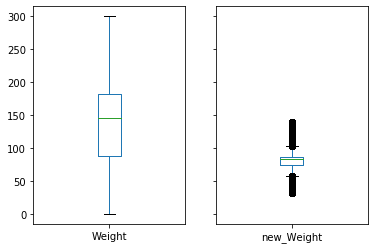

In [20]:
#Plot before and after
fig, ax = plt.subplots(ncols=2, sharey=True)

df_all["Weight"].plot(kind="box", ax=ax[0])
df_all["new_Weight"].plot(kind="box", ax=ax[1])

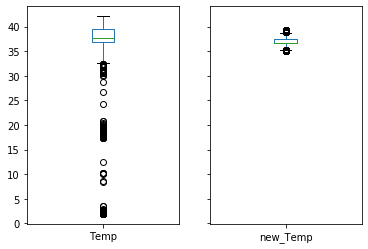

In [21]:
#Plot before and after
fig, ax = plt.subplots(ncols=2, sharey=True)

df_all["Temp"].plot(kind="box", ax=ax[0])
df_all["new_Temp"].plot(kind="box", ax=ax[1])

In [22]:
#Confirm imputation
new_df = df_all.groupby('Patient').mean()[['Age', 'Gender', 'new_Height', 'new_Weight']]
new_df = new_df.reset_index()
# df.columns = df.columns.get_level_values(1) 

new_df.columns = ['Patient', 'Age', 'Gender', 'Height', 'Weight']
new_df.head()

,Patient,Age,Gender,Height,Weight
0,132539,54.0,0.0,NaN,NaN
1,132540,76.0,1.0,175.3,80.670588
2,132541,44.0,0.0,NaN,56.700000
3,132543,68.0,1.0,180.3,84.600000
4,132545,88.0,0.0,NaN,NaN


In [23]:
#Confirm imputation
df_all[['Height', 'new_Height', 'Weight', 'new_Weight', 'Temp', 'new_Temp']].describe()
# df_all.drop(['Height','Weight','Temp'], axis=1, inplace=True)

,Height,new_Height,Weight,new_Weight,Temp,new_Temp
count,3365.000000,3365.000000,347487.000000,347487.000000,198505.000000,198505.000000
mean,171.416880,171.227637,137.546566,81.567995,37.448091,36.984009
std,17.520105,10.661085,52.276962,13.090153,3.244877,0.747404
min,1.800000,142.200000,0.600000,31.700000,1.900000,35.000000
25%,165.100000,165.100000,88.600000,74.900000,36.800000,36.600000
50%,172.700000,172.700000,145.800000,84.000000,37.600000,36.600000
75%,177.800000,177.800000,183.000000,86.200000,39.600000,37.500000
max,431.800000,198.100000,300.000000,139.400000,42.100000,39.350000


In [24]:
#View data
df_all.head()

,Patient,Time,ALP,ALT,AST,Age,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,DiasABP,FiO2,GCS,Gender,Glucose,HCO3,HCT,HR,Height,ICUType,K,Lactate,MAP,MechVent,Mg,NIDiasABP,NIMAP,NISysABP,Na,PaCO2,PaO2,Platelets,RespRate,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,Weight,pH,SAPS-I,SOFA,Length_of_stay,Survival,In-hospital_death,new_Height,new_Weight,new_Temp
0,132539,00:00,NaN,NaN,NaN,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,1,5,-1,0,NaN,NaN,NaN
1,132539,00:07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.0,92.33,147.0,NaN,NaN,NaN,NaN,19.0,NaN,NaN,35.1,NaN,NaN,900.0,NaN,NaN,NaN,6,1,5,-1,0,NaN,NaN,35.1
2,132539,00:37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.0,91.00,157.0,NaN,NaN,NaN,NaN,19.0,NaN,NaN,35.6,NaN,NaN,60.0,NaN,NaN,NaN,6,1,5,-1,0,NaN,NaN,35.6
3,132539,01:37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,87.00,137.0,NaN,NaN,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN,30.0,NaN,NaN,NaN,6,1,5,-1,0,NaN,NaN,NaN
4,132539,02:37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,75.67,123.0,NaN,NaN,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN,170.0,NaN,NaN,NaN,6,1,5,-1,0,NaN,NaN,NaN


### 1.2.3 Mechanical Ventilation

In [25]:
#Fill NA with 0 for MechVent
df_all['MechVent'] = df_all['MechVent'].fillna(0)

#View top rows of data
df_all.head()

,Patient,Time,ALP,ALT,AST,Age,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,DiasABP,FiO2,GCS,Gender,Glucose,HCO3,HCT,HR,Height,ICUType,K,Lactate,MAP,MechVent,Mg,NIDiasABP,NIMAP,NISysABP,Na,PaCO2,PaO2,Platelets,RespRate,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,Weight,pH,SAPS-I,SOFA,Length_of_stay,Survival,In-hospital_death,new_Height,new_Weight,new_Temp
0,132539,00:00,NaN,NaN,NaN,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,1,5,-1,0,NaN,NaN,NaN
1,132539,00:07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,65.0,92.33,147.0,NaN,NaN,NaN,NaN,19.0,NaN,NaN,35.1,NaN,NaN,900.0,NaN,NaN,NaN,6,1,5,-1,0,NaN,NaN,35.1
2,132539,00:37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,58.0,91.00,157.0,NaN,NaN,NaN,NaN,19.0,NaN,NaN,35.6,NaN,NaN,60.0,NaN,NaN,NaN,6,1,5,-1,0,NaN,NaN,35.6
3,132539,01:37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,62.0,87.00,137.0,NaN,NaN,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN,30.0,NaN,NaN,NaN,6,1,5,-1,0,NaN,NaN,NaN
4,132539,02:37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,52.0,75.67,123.0,NaN,NaN,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN,170.0,NaN,NaN,NaN,6,1,5,-1,0,NaN,NaN,NaN


### 1.2.4. Heart Rate

In [26]:
#View statistics before imputation
df_all['HR'].describe()

count    445628.000000
mean         93.907897
std          22.956140
min           0.000000
25%          77.000000
50%          90.000000
75%         109.000000
max         300.000000
Name: HR, dtype: float64

In [27]:
#Backfill last value for each patient
df_all['HR'] = df_all.groupby(['Patient'], sort=False)['HR'].apply(lambda x: x.bfill().ffill())

In [28]:
#Obtain patients with NA values for HR
df_all.groupby(['Patient']).aggregate({'HR': ['min', 'max']})[df_all.groupby(['Patient']).aggregate({'HR': ['min', 'max']}).sort_values(('HR', 'min'))[('HR', 'min')].isna()]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


HR    
        min max
Patient        
132595  NaN NaN
132647  NaN NaN
132786  NaN NaN
132988  NaN NaN
133039  NaN NaN
...      ..  ..
141715  NaN NaN
142061  NaN NaN
142233  NaN NaN
142245  NaN NaN
142404  NaN NaN

[62 rows x 2 columns]

In [29]:
#Obtain patient with HR 0
HR_list = pd.DataFrame(df_all[df_all['HR'] == 0]['Patient'].drop_duplicates())
# display([HR_list])

#View statistics of patient
df_all[df_all['Patient'].isin(HR_list['Patient'])].groupby('Patient').aggregate({'HR': ['min', 'max', 'median']})

HR              
         min    max median
Patient                   
132894   0.0   99.0   75.5
132960   0.0  150.0  108.0
133895   0.0   96.0   83.0
134010   0.0   91.0   73.0
135603   0.0  119.0   88.0
136298   0.0   93.0   74.0
136929   0.0  100.0   86.0
137703   0.0   89.0   52.0
138293   0.0   94.0   67.0
138470   0.0  130.0   96.0
140673   0.0   85.0   61.0

In [30]:
#Impute HR with patients' median
# df_all[df_all['Patient'].isin(HR_list['Patient'])]['HR'] = 
# df_all[df_all['Patient'].isin(HR_list['Patient'])][['Patient', 'HR']].groupby(['Patient'], sort=False)['HR'].apply(lambda x: x.fillna(x.median()))
df_all['HR'] = [np.nan if x==0 else x for x in df_all['HR']]

df_all['HR'] = df_all.groupby(['Patient'], sort=False)['HR'].apply(lambda x: x.fillna(x.median()))

In [31]:
#View statistics after imputation
df_all['HR'].describe()

count    518137.000000
mean         93.222407
std          22.427000
min           3.500000
25%          77.000000
50%          90.000000
75%         108.000000
max         300.000000
Name: HR, dtype: float64

In [32]:
#View data before imputation for RespRate
df_all.groupby(['Patient']).aggregate({'RespRate': ['min', 'max']})[df_all.groupby(['Patient']).aggregate({'RespRate': ['min', 'max']}).sort_values(('RespRate', 'min'))[('RespRate', 'min')].isna()]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


RespRate    
             min max
Patient             
132540       NaN NaN
132541       NaN NaN
132547       NaN NaN
132551       NaN NaN
132555       NaN NaN
...          ...  ..
142664       NaN NaN
142665       NaN NaN
142670       NaN NaN
142671       NaN NaN
142673       NaN NaN

[2897 rows x 2 columns]

### 1.2.5 Respiratory Rate 

In [33]:
#Replace respiratory with zero value by NaN, group by patient followed by backfill
df_all['RespRate'] = df_all['RespRate'].replace(0, np.nan)

df_all.loc[:,'RespRate'] = df_all.loc[:,'RespRate'].fillna(df_all.groupby('Patient')['RespRate'].bfill())

In [34]:
#View statistics
df_all['RespRate'].describe()

count    86782.000000
mean        19.795009
std          5.382033
min          1.000000
25%         16.000000
50%         19.000000
75%         23.000000
max         98.000000
Name: RespRate, dtype: float64

In [35]:
#Select first reading
# df_all.groupby(['Patient'])[['Patient', 'RespRate']].head(1).reset_index().sort_values('RespRate', ascending=True)
df_all.groupby(['Patient'])['RespRate'].nth(0).reset_index().sort_values('RespRate', ascending=True)

,Patient,RespRate
1619,136641,7.0
3227,140754,8.0
770,134515,8.0
3632,141775,8.0
3962,142579,8.0
...,...,...
3991,142664,NaN
3992,142665,NaN
3994,142670,NaN
3995,142671,NaN


### 1.2.6 pH 

count    24823.000000
mean         7.486002
std          8.166054
min          1.000000
25%          7.330000
50%          7.380000
75%          7.420000
max        735.000000
Name: pH, dtype: float64

,Patient,pH
42336,133473,95.0
102370,135020,100.0
351228,140287,94.0
351230,140287,96.0
358089,140525,734.0
358096,140525,735.0
412926,141680,187.0
422775,141938,94.0
512731,142564,733.0


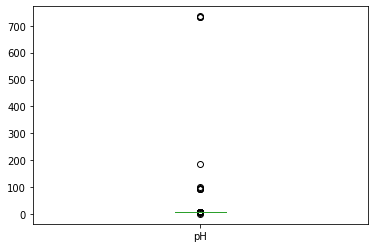

In [36]:
#View statistics
display(df_all['pH'].describe())

#Boxplot
df_all['pH'].plot(kind='box')

#Display patients with outliers
display(df_all[df_all['pH'] > 8][['Patient', 'pH']])

In [37]:
#Impute pH that are in the range of 100
df_all['pH'] = [x/100 if ((x>=600) and (x<=800)) else x for x in df_all['pH']]

In [38]:
#Mask pH readings >8 (pH should be between 6 and 8)
df_all['pH'] = df_all['pH'].mask(df_all['pH'] > 8) 
df_all['pH'].describe()

count    24817.000000
mean         7.373133
std          0.091599
min          1.000000
25%          7.330000
50%          7.380000
75%          7.420000
max          7.690000
Name: pH, dtype: float64

In [39]:
#Mask pH readings <6(pH should be between 6 and 8)
df_all['pH'] = df_all['pH'].mask(df_all['pH'] < 6) 
df_all['pH'].describe()

count    24815.000000
mean         7.373566
std          0.077351
min          6.820000
25%          7.330000
50%          7.380000
75%          7.420000
max          7.690000
Name: pH, dtype: float64

### 1.2.7 Compare with reference range

In [40]:
#Read file
df_ref = pd.read_excel('reference range/reference_range.xlsx')
df_ref.head()

,Variables,Definitions,Min_Male,Max_Male,Min_Female,Max_Female,Unit,Changed
0,Albumin,g/dL,3500.0,5000.0,NaN,NaN,mg/dL,Multiply by 1000
1,ALP,Alkaline phosphatase (IU/L),30.0,120.0,NaN,NaN,IU/L,NaN
2,ALT,Alanine transaminase (IU/L),10.0,35.0,NaN,NaN,IU/L,NaN
3,AST,Aspartate transaminase (IU/L),10.0,35.0,NaN,NaN,IU/L,NaN
4,Bilirubin,mg/dL,0.3,1.0,NaN,NaN,mg/dL,NaN


In [41]:
#Convert Albumin from g/dL to mg/dL
df_all['Albumin'] = df_all['Albumin']*1000

#Convert Troponin from ug/dL to mg/dL
df_all['TroponinI'] = df_all['TroponinI']/10
df_all['TroponinT'] = df_all['TroponinT']/10

## 1.3 Feature engineering

### 1.3.1 PaO2FiO2 ratio

In [42]:
#Calculate ratio
df_all['PaO2FiO2'] = df_all['PaO2'] / df_all['FiO2']

### 1.3.2 Aggregation of data and Feature engineering

In [43]:
#User-defined function to find out spread or range of data
def diff(series):
    return series.max() - series.min()

#def norm(series):
#    return (series.max() - series.min())/series.mean()

#Retrieve and calculate min and max 
df_all_group = df_all.groupby('Patient').agg(['min', 'max', 'mean', 'median', 'first']).reset_index()
df_all_group.head(1)

Patient ALP                       ALT                       AST           \
          min max mean median first min max mean median first min max mean   
0  132539 NaN NaN  NaN    NaN   NaN NaN NaN  NaN    NaN   NaN NaN NaN  NaN   

                 Age                          Albumin                        \
  median first   min   max  mean median first     min max mean median first   
0    NaN   NaN  54.0  54.0  54.0   54.0  54.0     NaN NaN  NaN    NaN   NaN   

   BUN                          Bilirubin                       Cholesterol  \
   min   max  mean median first       min max mean median first         min   
0  8.0  13.0  10.5   10.5  13.0       NaN NaN  NaN    NaN   NaN         NaN   

                        Creatinine                         DiasABP           \
  max mean median first        min  max  mean median first     min max mean   
0 NaN  NaN    NaN   NaN        0.7  0.8  0.75   0.75   0.8     NaN NaN  NaN   

               FiO2                         GCS                                \
  median first  min max mean median first   min   max       mean median first   
0    NaN   NaN  NaN NaN  NaN    NaN   NaN  14.0  15.0  14.923077   15.0  15.0   

  Gender                        Glucose                              HCO3  \
     min  max mean median first     min    max   mean median  first   min   
0    0.0  0.0  0.0    0.0   0.0   115.0  205.0  160.0  160.0  205.0  26.0   

                             HCT                             HR        \
    max  mean median first   min   max  mean median first   min   max   
0  28.0  27.0   27.0  26.0  30.3  33.7  32.5   33.5  33.7  58.0  86.0   

                          Height                       ICUType            \
        mean median first    min max mean median first     min  max mean   
0  73.156863   73.0  73.0    NaN NaN  NaN    NaN   NaN     4.0  4.0  4.0   

                  K                        Lactate                       MAP  \
  median first  min  max mean median first     min max mean median first min   
0    4.0   4.0  4.0  4.4  4.2    4.2   4.4     NaN NaN  NaN    NaN   NaN NaN   

                        MechVent                          Mg                   \
  max mean median first      min  max mean median first  min  max mean median   
0 NaN  NaN    NaN   NaN      0.0  0.0  0.0    0.0   0.0  1.5  1.9  1.7    1.7   

        NIDiasABP                                NIMAP                    \
  first       min   max       mean median first    min    max       mean   
0   1.5      39.0  67.0  50.147059   49.0  65.0  58.67  92.33  71.559118   

                NISysABP                                      Na         \
  median  first      min    max        mean median  first    min    max   
0   70.0  92.33     96.0  157.0  114.382353  110.0  147.0  136.0  137.0   

                       PaCO2                       PaO2                        \
    mean median  first   min max mean median first  min max mean median first   
0  136.5  136.5  137.0   NaN NaN  NaN    NaN   NaN  NaN NaN  NaN    NaN   NaN   

  Platelets                             RespRate                          \
        min    max   mean median  first      min   max       mean median   
0     185.0  221.0  203.0  203.0  221.0     12.0  24.0  17.666667   18.0   

        SaO2                       SysABP                        Temp        \
  first  min max mean median first    min max mean median first   min   max   
0  19.0  NaN NaN  NaN    NaN   NaN    NaN NaN  NaN    NaN   NaN  35.1  38.2   

                          TroponinI                       TroponinT           \
        mean median first       min max mean median first       min max mean   
0  37.357143   37.7  35.1       NaN NaN  NaN    NaN   NaN       NaN NaN  NaN   

               Urine                                  WBC                     \
  median first   min    max       mean median  first  min   max  mean median   
0    NaN   NaN  30.0  900.0  170.27027  100.0  900.0  9.4  11.2  10.3   10.3

In [44]:
#Flatten multi-index
df_all_group.columns = pd.Series(df_all_group.columns.tolist()).apply(pd.Series).sum(axis=1)

#View top rows of data
df_all_group.head(1)
# df_all_group.columns.values

,Patient,ALPmin,ALPmax,ALPmean,ALPmedian,ALPfirst,ALTmin,ALTmax,ALTmean,ALTmedian,ALTfirst,ASTmin,ASTmax,ASTmean,ASTmedian,ASTfirst,Agemin,Agemax,Agemean,Agemedian,Agefirst,Albuminmin,Albuminmax,Albuminmean,Albuminmedian,Albuminfirst,BUNmin,BUNmax,BUNmean,BUNmedian,BUNfirst,Bilirubinmin,Bilirubinmax,Bilirubinmean,Bilirubinmedian,Bilirubinfirst,Cholesterolmin,Cholesterolmax,Cholesterolmean,Cholesterolmedian,Cholesterolfirst,Creatininemin,Creatininemax,Creatininemean,Creatininemedian,Creatininefirst,DiasABPmin,DiasABPmax,DiasABPmean,DiasABPmedian,DiasABPfirst,FiO2min,FiO2max,FiO2mean,FiO2median,FiO2first,GCSmin,GCSmax,GCSmean,GCSmedian,GCSfirst,Gendermin,Gendermax,Gendermean,Gendermedian,Genderfirst,Glucosemin,Glucosemax,Glucosemean,Glucosemedian,Glucosefirst,HCO3min,HCO3max,HCO3mean,HCO3median,HCO3first,HCTmin,HCTmax,HCTmean,HCTmedian,HCTfirst,HRmin,HRmax,HRmean,HRmedian,HRfirst,Heightmin,Heightmax,Heightmean,Heightmedian,Heightfirst,ICUTypemin,ICUTypemax,ICUTypemean,ICUTypemedian,ICUTypefirst,Kmin,Kmax,Kmean,Kmedian,Kfirst,Lactatemin,Lactatemax,Lactatemean,Lactatemedian,Lactatefirst,MAPmin,MAPmax,MAPmean,MAPmedian,MAPfirst,MechVentmin,MechVentmax,MechVentmean,MechVentmedian,MechVentfirst,Mgmin,Mgmax,Mgmean,Mgmedian,Mgfirst,NIDiasABPmin,NIDiasABPmax,NIDiasABPmean,NIDiasABPmedian,NIDiasABPfirst,NIMAPmin,NIMAPmax,NIMAPmean,NIMAPmedian,NIMAPfirst,NISysABPmin,NISysABPmax,NISysABPmean,NISysABPmedian,NISysABPfirst,Namin,Namax,Namean,Namedian,Nafirst,PaCO2min,PaCO2max,PaCO2mean,PaCO2median,PaCO2first,PaO2min,PaO2max,PaO2mean,PaO2median,PaO2first,Plateletsmin,Plateletsmax,Plateletsmean,Plateletsmedian,Plateletsfirst,RespRatemin,RespRatemax,RespRatemean,RespRatemedian,RespRatefirst,SaO2min,SaO2max,SaO2mean,SaO2median,SaO2first,SysABPmin,SysABPmax,SysABPmean,SysABPmedian,SysABPfirst,Tempmin,Tempmax,Tempmean,Tempmedian,Tempfirst,TroponinImin,TroponinImax,TroponinImean,TroponinImedian,TroponinIfirst,TroponinTmin,TroponinTmax,TroponinTmean,TroponinTmedian,TroponinTfirst,Urinemin,Urinemax,Urinemean,Urinemedian,Urinefirst,WBCmin,WBCmax,WBCmean,WBCmedian,WBCfirst,Weightmin,Weightmax,Weightmean,Weightmedian,Weightfirst,pHmin,pHmax,pHmean,pHmedian,pHfirst,SAPS-Imin,SAPS-Imax,SAPS-Imean,SAPS-Imedian,SAPS-Ifirst,SOFAmin,SOFAmax,SOFAmean,SOFAmedian,SOFAfirst,Length_of_staymin,Length_of_staymax,Length_of_staymean,Length_of_staymedian,Length_of_stayfirst,Survivalmin,Survivalmax,Survivalmean,Survivalmedian,Survivalfirst,In-hospital_deathmin,In-hospital_deathmax,In-hospital_deathmean,In-hospital_deathmedian,In-hospital_deathfirst,new_Heightmin,new_Heightmax,new_Heightmean,new_Heightmedian,new_Heightfirst,new_Weightmin,new_Weightmax,new_Weightmean,new_Weightmedian,new_Weightfirst,new_Tempmin,new_Tempmax,new_Tempmean,new_Tempmedian,new_Tempfirst,PaO2FiO2min,PaO2FiO2max,PaO2FiO2mean,PaO2FiO2median,PaO2FiO2first
0,132539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.0,54.0,54.0,54.0,54.0,NaN,NaN,NaN,NaN,NaN,8.0,13.0,10.5,10.5,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7,0.8,0.75,0.75,0.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,15.0,14.923077,15.0,15.0,0.0,0.0,0.0,0.0,0.0,115.0,205.0,160.0,160.0,205.0,26.0,28.0,27.0,27.0,26.0,30.3,33.7,32.5,33.5,33.7,58.0,86.0,73.156863,73.0,73.0,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,4.0,4.0,4.0,4.4,4.2,4.2,4.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.5,1.9,1.7,1.7,1.5,39.0,67.0,50.147059,49.0,65.0,58.67,92.33,71.559118,70.0,92.33,96.0,157.0,114.382353,110.0,147.0,136.0,137.0,136.5,136.5,137.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,185.0,221.0,203.0,203.0,221.0,12.0,24.0,17.666667,18.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.1,38.2,37.357143,37.7,35.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,900.0,170.27027,100.0,900.0,9.4,11.2,10.3,10.3,11.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,6,6,6,6,1,1,1,1,1,5,5,5,5,5,-1,-1,-1,-1,-1,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.1,38.2,37.357143,37.7,35.1,NaN,NaN,NaN,NaN,NaN


### 1.3.3 BMI

In [45]:
#Calculate BMI at first time upon admission (first Height and first Weight) to find out if patient is overweight
df_all_group['BMI'] = round(df_all_group['new_Weightfirst'] / (df_all_group['new_Heightfirst']/100)**2, 2)
df_all_group

,Patient,ALPmin,ALPmax,ALPmean,ALPmedian,ALPfirst,ALTmin,ALTmax,ALTmean,ALTmedian,ALTfirst,ASTmin,ASTmax,ASTmean,ASTmedian,ASTfirst,Agemin,Agemax,Agemean,Agemedian,Agefirst,Albuminmin,Albuminmax,Albuminmean,Albuminmedian,Albuminfirst,BUNmin,BUNmax,BUNmean,BUNmedian,BUNfirst,Bilirubinmin,Bilirubinmax,Bilirubinmean,Bilirubinmedian,Bilirubinfirst,Cholesterolmin,Cholesterolmax,Cholesterolmean,Cholesterolmedian,Cholesterolfirst,Creatininemin,Creatininemax,Creatininemean,Creatininemedian,Creatininefirst,DiasABPmin,DiasABPmax,DiasABPmean,DiasABPmedian,DiasABPfirst,FiO2min,FiO2max,FiO2mean,FiO2median,FiO2first,GCSmin,GCSmax,GCSmean,GCSmedian,GCSfirst,Gendermin,Gendermax,Gendermean,Gendermedian,Genderfirst,Glucosemin,Glucosemax,Glucosemean,Glucosemedian,Glucosefirst,HCO3min,HCO3max,HCO3mean,HCO3median,HCO3first,HCTmin,HCTmax,HCTmean,HCTmedian,HCTfirst,HRmin,HRmax,HRmean,HRmedian,HRfirst,Heightmin,Heightmax,Heightmean,Heightmedian,Heightfirst,ICUTypemin,ICUTypemax,ICUTypemean,ICUTypemedian,ICUTypefirst,Kmin,Kmax,Kmean,Kmedian,Kfirst,Lactatemin,Lactatemax,Lactatemean,Lactatemedian,Lactatefirst,MAPmin,MAPmax,MAPmean,MAPmedian,MAPfirst,MechVentmin,MechVentmax,MechVentmean,MechVentmedian,MechVentfirst,Mgmin,Mgmax,Mgmean,Mgmedian,Mgfirst,NIDiasABPmin,NIDiasABPmax,NIDiasABPmean,NIDiasABPmedian,NIDiasABPfirst,NIMAPmin,NIMAPmax,NIMAPmean,NIMAPmedian,NIMAPfirst,NISysABPmin,NISysABPmax,NISysABPmean,NISysABPmedian,NISysABPfirst,Namin,Namax,Namean,Namedian,Nafirst,PaCO2min,PaCO2max,PaCO2mean,PaCO2median,PaCO2first,PaO2min,PaO2max,PaO2mean,PaO2median,PaO2first,Plateletsmin,Plateletsmax,Plateletsmean,Plateletsmedian,Plateletsfirst,RespRatemin,RespRatemax,RespRatemean,RespRatemedian,RespRatefirst,SaO2min,SaO2max,SaO2mean,SaO2median,SaO2first,SysABPmin,SysABPmax,SysABPmean,SysABPmedian,SysABPfirst,Tempmin,Tempmax,Tempmean,Tempmedian,Tempfirst,TroponinImin,TroponinImax,TroponinImean,TroponinImedian,TroponinIfirst,TroponinTmin,TroponinTmax,TroponinTmean,TroponinTmedian,TroponinTfirst,Urinemin,Urinemax,Urinemean,Urinemedian,Urinefirst,WBCmin,WBCmax,WBCmean,WBCmedian,WBCfirst,Weightmin,Weightmax,Weightmean,Weightmedian,Weightfirst,pHmin,pHmax,pHmean,pHmedian,pHfirst,SAPS-Imin,SAPS-Imax,SAPS-Imean,SAPS-Imedian,SAPS-Ifirst,SOFAmin,SOFAmax,SOFAmean,SOFAmedian,SOFAfirst,Length_of_staymin,Length_of_staymax,Length_of_staymean,Length_of_staymedian,Length_of_stayfirst,Survivalmin,Survivalmax,Survivalmean,Survivalmedian,Survivalfirst,In-hospital_deathmin,In-hospital_deathmax,In-hospital_deathmean,In-hospital_deathmedian,In-hospital_deathfirst,new_Heightmin,new_Heightmax,new_Heightmean,new_Heightmedian,new_Heightfirst,new_Weightmin,new_Weightmax,new_Weightmean,new_Weightmedian,new_Weightfirst,new_Tempmin,new_Tempmax,new_Tempmean,new_Tempmedian,new_Tempfirst,PaO2FiO2min,PaO2FiO2max,PaO2FiO2mean,PaO2FiO2median,PaO2FiO2first,BMI
0,132539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.0,54.0,54.0,54.0,54.0,NaN,NaN,NaN,NaN,NaN,8.0,13.0,10.500000,10.5,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7,0.8,0.750000,0.75,0.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,15.0,14.923077,15.0,15.0,0.0,0.0,0.0,0.0,0.0,115.0,205.0,160.000000,160.0,205.0,26.0,28.0,27.000000,27.0,26.0,30.3,33.7,32.500000,33.50,33.7,58.0,86.0,73.156863,73.0,73.0,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,4.0,4.0,4.0,4.4,4.20,4.20,4.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.000000,0.0,0.0,1.5,1.9,1.700000,1.70,1.5,39.0,67.0,50.147059,49.0,65.0,58.67,92.33,71.559118,70.000,92.33,96.0,157.0,114.382353,110.0,147.0,136.0,137.0,136.500000,136.5,137.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,185.0,221.0,203.000000,203.0,221.0,12.0,24.0,17.666667,18.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.1,38.2,37.357143,37.70,35.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,900.0,170.270270,100.0,900.0,9.4,11.2,10.300000,10.30,11.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,6,6,6,6,1,1,1,1,1,5,5,5,5,5,-1,-1,-1,-1,-1,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.1,38.2,37.357143,37.70,35.1,NaN,

In [46]:
#Create BMI category

#Underweight
df_all_group['BMI_Cat'] = [-1 if BMI < 18.5 else 0 for BMI in df_all_group['BMI']]

#Overweight
df_all_group['BMI_Cat'] = [1 if BMI > 25 else BMI_Cat for BMI, BMI_Cat in zip(df_all_group['BMI'], df_all_group['BMI_Cat'])]

#Obese
df_all_group['BMI_Cat'] = [2 if BMI > 30 else BMI_Cat for BMI, BMI_Cat in zip(df_all_group['BMI'], df_all_group['BMI_Cat'])]

#View data
df_all_group['BMI_Cat']

0       0
1       0
2       0
3       1
4       0
       ..
3992    0
3993    0
3994    0
3995    0
3996    1
Name: BMI_Cat, Length: 3997, dtype: int64

### 1.3.4 Average urine output

In [47]:
#Obtain max time of stay in hospital and total sum of urine
df_urine = df_all.groupby(['Patient']).aggregate({'Time': 'max', 'Urine': 'sum'}).reset_index()
# df_urine_avg = df_urine['Urine'] / df_urine['Time']

In [48]:
#Get hour
df_urine['Hour'] = [int(x.split(':')[0])+1 for x in df_urine['Time']]

In [49]:
#Calculate average urine output per hour
df_urine['Urinemean48h'] = round(df_urine['Urine'] / df_urine['Hour'], 2)
df_urine_avg = df_urine
df_urine_avg

,Patient,Time,Urine,Hour,Urinemean48h
0,132539,47:37,6300.0,48,131.25
1,132540,47:11,6214.0,48,129.46
2,132541,47:17,5123.0,48,106.73
3,132543,47:36,3275.0,48,68.23
4,132545,47:33,2361.0,48,49.19
...,...,...,...,...,...
3992,142665,47:23,1980.0,48,41.25
3993,142667,47:10,66625.0,48,1388.02
3994,142670,47:52,4193.0,48,87.35
3995,142671,47:52,146.0,48,3.04


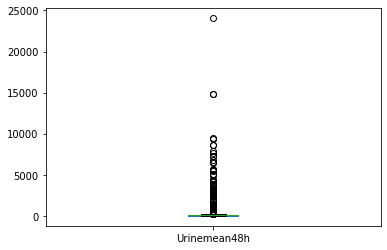

In [50]:
#Plot average urine output per hour
df_urine_avg['Urinemean48h'].plot(kind='box')

In [51]:
#Merge data with existing dataframe
df_all_group = pd.merge(df_all_group, df_urine_avg[['Patient', 'Urinemean48h']], how="left", on="Patient")

In [52]:
#View top few rows
df_all_group.head()

,Patient,ALPmin,ALPmax,ALPmean,ALPmedian,ALPfirst,ALTmin,ALTmax,ALTmean,ALTmedian,ALTfirst,ASTmin,ASTmax,ASTmean,ASTmedian,ASTfirst,Agemin,Agemax,Agemean,Agemedian,Agefirst,Albuminmin,Albuminmax,Albuminmean,Albuminmedian,Albuminfirst,BUNmin,BUNmax,BUNmean,BUNmedian,BUNfirst,Bilirubinmin,Bilirubinmax,Bilirubinmean,Bilirubinmedian,Bilirubinfirst,Cholesterolmin,Cholesterolmax,Cholesterolmean,Cholesterolmedian,Cholesterolfirst,Creatininemin,Creatininemax,Creatininemean,Creatininemedian,Creatininefirst,DiasABPmin,DiasABPmax,DiasABPmean,DiasABPmedian,DiasABPfirst,FiO2min,FiO2max,FiO2mean,FiO2median,FiO2first,GCSmin,GCSmax,GCSmean,GCSmedian,GCSfirst,Gendermin,Gendermax,Gendermean,Gendermedian,Genderfirst,Glucosemin,Glucosemax,Glucosemean,Glucosemedian,Glucosefirst,HCO3min,HCO3max,HCO3mean,HCO3median,HCO3first,HCTmin,HCTmax,HCTmean,HCTmedian,HCTfirst,HRmin,HRmax,HRmean,HRmedian,HRfirst,Heightmin,Heightmax,Heightmean,Heightmedian,Heightfirst,ICUTypemin,ICUTypemax,ICUTypemean,ICUTypemedian,ICUTypefirst,Kmin,Kmax,Kmean,Kmedian,Kfirst,Lactatemin,Lactatemax,Lactatemean,Lactatemedian,Lactatefirst,MAPmin,MAPmax,MAPmean,MAPmedian,MAPfirst,MechVentmin,MechVentmax,MechVentmean,MechVentmedian,MechVentfirst,Mgmin,Mgmax,Mgmean,Mgmedian,Mgfirst,NIDiasABPmin,NIDiasABPmax,NIDiasABPmean,NIDiasABPmedian,NIDiasABPfirst,NIMAPmin,NIMAPmax,NIMAPmean,NIMAPmedian,NIMAPfirst,NISysABPmin,NISysABPmax,NISysABPmean,NISysABPmedian,NISysABPfirst,Namin,Namax,Namean,Namedian,Nafirst,PaCO2min,PaCO2max,PaCO2mean,PaCO2median,PaCO2first,PaO2min,PaO2max,PaO2mean,PaO2median,PaO2first,Plateletsmin,Plateletsmax,Plateletsmean,Plateletsmedian,Plateletsfirst,RespRatemin,RespRatemax,RespRatemean,RespRatemedian,RespRatefirst,SaO2min,SaO2max,SaO2mean,SaO2median,SaO2first,SysABPmin,SysABPmax,SysABPmean,SysABPmedian,SysABPfirst,Tempmin,Tempmax,Tempmean,Tempmedian,Tempfirst,TroponinImin,TroponinImax,TroponinImean,TroponinImedian,TroponinIfirst,TroponinTmin,TroponinTmax,TroponinTmean,TroponinTmedian,TroponinTfirst,Urinemin,Urinemax,Urinemean,Urinemedian,Urinefirst,WBCmin,WBCmax,WBCmean,WBCmedian,WBCfirst,Weightmin,Weightmax,Weightmean,Weightmedian,Weightfirst,pHmin,pHmax,pHmean,pHmedian,pHfirst,SAPS-Imin,SAPS-Imax,SAPS-Imean,SAPS-Imedian,SAPS-Ifirst,SOFAmin,SOFAmax,SOFAmean,SOFAmedian,SOFAfirst,Length_of_staymin,Length_of_staymax,Length_of_staymean,Length_of_staymedian,Length_of_stayfirst,Survivalmin,Survivalmax,Survivalmean,Survivalmedian,Survivalfirst,In-hospital_deathmin,In-hospital_deathmax,In-hospital_deathmean,In-hospital_deathmedian,In-hospital_deathfirst,new_Heightmin,new_Heightmax,new_Heightmean,new_Heightmedian,new_Heightfirst,new_Weightmin,new_Weightmax,new_Weightmean,new_Weightmedian,new_Weightfirst,new_Tempmin,new_Tempmax,new_Tempmean,new_Tempmedian,new_Tempfirst,PaO2FiO2min,PaO2FiO2max,PaO2FiO2mean,PaO2FiO2median,PaO2FiO2first,BMI,BMI_Cat,Urinemean48h
0,132539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.0,54.0,54.0,54.0,54.0,NaN,NaN,NaN,NaN,NaN,8.0,13.0,10.500000,10.5,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7,0.8,0.750000,0.75,0.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,15.0,14.923077,15.0,15.0,0.0,0.0,0.0,0.0,0.0,115.0,205.0,160.000000,160.0,205.0,26.0,28.0,27.000000,27.0,26.0,30.3,33.7,32.500000,33.5,33.7,58.0,86.0,73.156863,73.0,73.0,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,4.0,4.0,4.0,4.4,4.20,4.2,4.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.000000,0.0,0.0,1.5,1.9,1.700000,1.70,1.5,39.0,67.0,50.147059,49.0,65.0,58.67,92.33,71.559118,70.000,92.33,96.0,157.0,114.382353,110.0,147.0,136.0,137.0,136.500000,136.5,137.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,185.0,221.0,203.000000,203.0,221.0,12.0,24.0,17.666667,18.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.1,38.2,37.357143,37.70,35.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,900.0,170.270270,100.0,900.0,9.4,11.2,10.300000,10.3,11.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,6,6,6,6,1,1,1,1,1,5,5,5,5,5,-1,-1,-1,-1,-1,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.1,38.2,37.3571

### 1.3.5 Blood pressure

In [53]:
#Replace zero blood pressure readings by NaN
df_all_group[['NIMAPfirst', 'MAPfirst', 'NISysABPfirst','SysABPfirst', 'NIDiasABPfirst', 'DiasABPfirst']] = df_all_group[['NIMAPfirst', 'MAPfirst', 'NISysABPfirst','SysABPfirst', 'NIDiasABPfirst', 'DiasABPfirst']].replace(0, np.nan)

In [54]:
#Replace erroreous entries by NaN
df_all_group['SysABPfirst'] = df_all_group['SysABPfirst'].replace(7, np.nan)
df_all_group['NISysABPfirst'] = df_all_group['NISysABPfirst'].replace(2, np.nan)

In [55]:
#View statistics
df_all_group.describe()

,Patient,ALPmin,ALPmax,ALPmean,ALPmedian,ALPfirst,ALTmin,ALTmax,ALTmean,ALTmedian,ALTfirst,ASTmin,ASTmax,ASTmean,ASTmedian,ASTfirst,Agemin,Agemax,Agemean,Agemedian,Agefirst,Albuminmin,Albuminmax,Albuminmean,Albuminmedian,Albuminfirst,BUNmin,BUNmax,BUNmean,BUNmedian,BUNfirst,Bilirubinmin,Bilirubinmax,Bilirubinmean,Bilirubinmedian,Bilirubinfirst,Cholesterolmin,Cholesterolmax,Cholesterolmean,Cholesterolmedian,Cholesterolfirst,Creatininemin,Creatininemax,Creatininemean,Creatininemedian,Creatininefirst,DiasABPmin,DiasABPmax,DiasABPmean,DiasABPmedian,DiasABPfirst,FiO2min,FiO2max,FiO2mean,FiO2median,FiO2first,GCSmin,GCSmax,GCSmean,GCSmedian,GCSfirst,Gendermin,Gendermax,Gendermean,Gendermedian,Genderfirst,Glucosemin,Glucosemax,Glucosemean,Glucosemedian,Glucosefirst,HCO3min,HCO3max,HCO3mean,HCO3median,HCO3first,HCTmin,HCTmax,HCTmean,HCTmedian,HCTfirst,HRmin,HRmax,HRmean,HRmedian,HRfirst,Heightmin,Heightmax,Heightmean,Heightmedian,Heightfirst,ICUTypemin,ICUTypemax,ICUTypemean,ICUTypemedian,ICUTypefirst,Kmin,Kmax,Kmean,Kmedian,Kfirst,Lactatemin,Lactatemax,Lactatemean,Lactatemedian,Lactatefirst,MAPmin,MAPmax,MAPmean,MAPmedian,MAPfirst,MechVentmin,MechVentmax,MechVentmean,MechVentmedian,MechVentfirst,Mgmin,Mgmax,Mgmean,Mgmedian,Mgfirst,NIDiasABPmin,NIDiasABPmax,NIDiasABPmean,NIDiasABPmedian,NIDiasABPfirst,NIMAPmin,NIMAPmax,NIMAPmean,NIMAPmedian,NIMAPfirst,NISysABPmin,NISysABPmax,NISysABPmean,NISysABPmedian,NISysABPfirst,Namin,Namax,Namean,Namedian,Nafirst,PaCO2min,PaCO2max,PaCO2mean,PaCO2median,PaCO2first,PaO2min,PaO2max,PaO2mean,PaO2median,PaO2first,Plateletsmin,Plateletsmax,Plateletsmean,Plateletsmedian,Plateletsfirst,RespRatemin,RespRatemax,RespRatemean,RespRatemedian,RespRatefirst,SaO2min,SaO2max,SaO2mean,SaO2median,SaO2first,SysABPmin,SysABPmax,SysABPmean,SysABPmedian,SysABPfirst,Tempmin,Tempmax,Tempmean,Tempmedian,Tempfirst,TroponinImin,TroponinImax,TroponinImean,TroponinImedian,TroponinIfirst,TroponinTmin,TroponinTmax,TroponinTmean,TroponinTmedian,TroponinTfirst,Urinemin,Urinemax,Urinemean,Urinemedian,Urinefirst,WBCmin,WBCmax,WBCmean,WBCmedian,WBCfirst,Weightmin,Weightmax,Weightmean,Weightmedian,Weightfirst,pHmin,pHmax,pHmean,pHmedian,pHfirst,SAPS-Imin,SAPS-Imax,SAPS-Imean,SAPS-Imedian,SAPS-Ifirst,SOFAmin,SOFAmax,SOFAmean,SOFAmedian,SOFAfirst,Length_of_staymin,Length_of_staymax,Length_of_staymean,Length_of_staymedian,Length_of_stayfirst,Survivalmin,Survivalmax,Survivalmean,Survivalmedian,Survivalfirst,In-hospital_deathmin,In-hospital_deathmax,In-hospital_deathmean,In-hospital_deathmedian,In-hospital_deathfirst,new_Heightmin,new_Heightmax,new_Heightmean,new_Heightmedian,new_Heightfirst,new_Weightmin,new_Weightmax,new_Weightmean,new_Weightmedian,new_Weightfirst,new_Tempmin,new_Tempmax,new_Tempmean,new_Tempmedian,new_Tempfirst,PaO2FiO2min,PaO2FiO2max,PaO2FiO2mean,PaO2FiO2median,PaO2FiO2first,BMI,BMI_Cat,Urinemean48h
count,3997.00000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1720.000000,1720.000000,1720.000000,1720.000000,1720.000000,1724.000000,1724.000000,1724.000000,1724.000000,1724.000000,3997.000000,3997.000000,3997.000000,3997.000000,3997.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,3933.000000,3933.000000,3933.000000,3933.000000,3933.000000,1717.000000,1717.000000,1717.000000,1717.000000,1717.000000,305.000000,305.000000,305.000000,305.000000,305.000000,3933.000000,3933.000000,3933.000000,3933.000000,3933.000000,2797.000000,2797.000000,2797.000000,2797.000000,2634.000000,2716.000000,2716.000000,2716.000000,2716.000000,2716.000000,3934.000000,3934.000000,3934.000000,3934.000000,3934.000000,3997.000000,3997.000000,3997.000000,3997.000000,3997.000000,3884.000000,3884.000000,3884.000000,3884.000000,3884.000000,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000,3933.000000,3933.000000,3933.000000,3933.000000,3933.000000,3935.000000,3935.000000,3935.000000,3935.000000,3935.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,3997.000000,3997.000000,3997.000000,3997.000000,3

In [56]:
#Find outlier for lower bound of NISysABP
#IQR_NISysABP= df_pivot_pressure_first.loc[:,(['Value'],['NISysABP'])].quantile(0.75) - df_pivot_pressure_first.loc[:,(['Value'],['NISysABP'])].quantile(0.25)
#Lower_bound = df_pivot_pressure_first.loc[:,(['Value'],['NISysABP'])].quantile(0.25) - 1.5 * IQR_NISysABP
#Upper_bound = df_pivot_pressure_first.loc[:,(['Value'],['NISysABP'])].quantile(0.25) + 1.5 * IQR_NISysABP
#print(IQR_NISysABP)
#print(Lower_bound), print(Upper_bound)

In [57]:
#Fill NaN values for NISysABP using values in SysABP
df_all_group['NISysABPfirst'] = df_all_group['NISysABPfirst'].fillna(df_all_group['SysABPfirst'])
df_all_group.tail(30)

#Fill NaN values for SysABP using values in NISysABP
df_all_group['SysABPfirst'] = df_all_group['SysABPfirst'].fillna(df_all_group['NISysABPfirst'])
df_all_group.head(30)

#Calculate mean SysABP
df_all_group['MeanSysABPfirst'] = df_all_group[['SysABPfirst', 'NISysABPfirst']].mean(axis=1)

#View top rows of data
df_all_group.head()

,Patient,ALPmin,ALPmax,ALPmean,ALPmedian,ALPfirst,ALTmin,ALTmax,ALTmean,ALTmedian,ALTfirst,ASTmin,ASTmax,ASTmean,ASTmedian,ASTfirst,Agemin,Agemax,Agemean,Agemedian,Agefirst,Albuminmin,Albuminmax,Albuminmean,Albuminmedian,Albuminfirst,BUNmin,BUNmax,BUNmean,BUNmedian,BUNfirst,Bilirubinmin,Bilirubinmax,Bilirubinmean,Bilirubinmedian,Bilirubinfirst,Cholesterolmin,Cholesterolmax,Cholesterolmean,Cholesterolmedian,Cholesterolfirst,Creatininemin,Creatininemax,Creatininemean,Creatininemedian,Creatininefirst,DiasABPmin,DiasABPmax,DiasABPmean,DiasABPmedian,DiasABPfirst,FiO2min,FiO2max,FiO2mean,FiO2median,FiO2first,GCSmin,GCSmax,GCSmean,GCSmedian,GCSfirst,Gendermin,Gendermax,Gendermean,Gendermedian,Genderfirst,Glucosemin,Glucosemax,Glucosemean,Glucosemedian,Glucosefirst,HCO3min,HCO3max,HCO3mean,HCO3median,HCO3first,HCTmin,HCTmax,HCTmean,HCTmedian,HCTfirst,HRmin,HRmax,HRmean,HRmedian,HRfirst,Heightmin,Heightmax,Heightmean,Heightmedian,Heightfirst,ICUTypemin,ICUTypemax,ICUTypemean,ICUTypemedian,ICUTypefirst,Kmin,Kmax,Kmean,Kmedian,Kfirst,Lactatemin,Lactatemax,Lactatemean,Lactatemedian,Lactatefirst,MAPmin,MAPmax,MAPmean,MAPmedian,MAPfirst,MechVentmin,MechVentmax,MechVentmean,MechVentmedian,MechVentfirst,Mgmin,Mgmax,Mgmean,Mgmedian,Mgfirst,NIDiasABPmin,NIDiasABPmax,NIDiasABPmean,NIDiasABPmedian,NIDiasABPfirst,NIMAPmin,NIMAPmax,NIMAPmean,NIMAPmedian,NIMAPfirst,NISysABPmin,NISysABPmax,NISysABPmean,NISysABPmedian,NISysABPfirst,Namin,Namax,Namean,Namedian,Nafirst,PaCO2min,PaCO2max,PaCO2mean,PaCO2median,PaCO2first,PaO2min,PaO2max,PaO2mean,PaO2median,PaO2first,Plateletsmin,Plateletsmax,Plateletsmean,Plateletsmedian,Plateletsfirst,RespRatemin,RespRatemax,RespRatemean,RespRatemedian,RespRatefirst,SaO2min,SaO2max,SaO2mean,SaO2median,SaO2first,SysABPmin,SysABPmax,SysABPmean,SysABPmedian,SysABPfirst,Tempmin,Tempmax,Tempmean,Tempmedian,Tempfirst,TroponinImin,TroponinImax,TroponinImean,TroponinImedian,TroponinIfirst,TroponinTmin,TroponinTmax,TroponinTmean,TroponinTmedian,TroponinTfirst,Urinemin,Urinemax,Urinemean,Urinemedian,Urinefirst,WBCmin,WBCmax,WBCmean,WBCmedian,WBCfirst,Weightmin,Weightmax,Weightmean,Weightmedian,Weightfirst,pHmin,pHmax,pHmean,pHmedian,pHfirst,SAPS-Imin,SAPS-Imax,SAPS-Imean,SAPS-Imedian,SAPS-Ifirst,SOFAmin,SOFAmax,SOFAmean,SOFAmedian,SOFAfirst,Length_of_staymin,Length_of_staymax,Length_of_staymean,Length_of_staymedian,Length_of_stayfirst,Survivalmin,Survivalmax,Survivalmean,Survivalmedian,Survivalfirst,In-hospital_deathmin,In-hospital_deathmax,In-hospital_deathmean,In-hospital_deathmedian,In-hospital_deathfirst,new_Heightmin,new_Heightmax,new_Heightmean,new_Heightmedian,new_Heightfirst,new_Weightmin,new_Weightmax,new_Weightmean,new_Weightmedian,new_Weightfirst,new_Tempmin,new_Tempmax,new_Tempmean,new_Tempmedian,new_Tempfirst,PaO2FiO2min,PaO2FiO2max,PaO2FiO2mean,PaO2FiO2median,PaO2FiO2first,BMI,BMI_Cat,Urinemean48h,MeanSysABPfirst
0,132539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.0,54.0,54.0,54.0,54.0,NaN,NaN,NaN,NaN,NaN,8.0,13.0,10.500000,10.5,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7,0.8,0.750000,0.75,0.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,15.0,14.923077,15.0,15.0,0.0,0.0,0.0,0.0,0.0,115.0,205.0,160.000000,160.0,205.0,26.0,28.0,27.000000,27.0,26.0,30.3,33.7,32.500000,33.5,33.7,58.0,86.0,73.156863,73.0,73.0,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,4.0,4.0,4.0,4.4,4.20,4.2,4.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.000000,0.0,0.0,1.5,1.9,1.700000,1.70,1.5,39.0,67.0,50.147059,49.0,65.0,58.67,92.33,71.559118,70.000,92.33,96.0,157.0,114.382353,110.0,147.0,136.0,137.0,136.500000,136.5,137.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,185.0,221.0,203.000000,203.0,221.0,12.0,24.0,17.666667,18.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,147.0,35.1,38.2,37.357143,37.70,35.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,900.0,170.270270,100.0,900.0,9.4,11.2,10.300000,10.3,11.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,6,6,6,6,1,1,1,1,1,5,5,5,5,5,-1,-1,-1,-1,-1,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [58]:
#Fill NaN values for NIDiasABP using values in DiasABP
df_all_group['NIDiasABPfirst'] = df_all_group['NIDiasABPfirst'].fillna(df_all_group['DiasABPfirst'])
df_all_group.tail(30)

#Fill NaN values for DiasABP using values in NIDiasABP
df_all_group['DiasABPfirst'] = df_all_group['DiasABPfirst'].fillna(df_all_group['NIDiasABPfirst'])
df_all_group.head(30)

#Calculate mean
df_all_group['MeanDiasABPfirst'] = df_all_group[['DiasABPfirst', 'NIDiasABPfirst']].mean(axis=1)

#View top rows of data
df_all_group.head()

,Patient,ALPmin,ALPmax,ALPmean,ALPmedian,ALPfirst,ALTmin,ALTmax,ALTmean,ALTmedian,ALTfirst,ASTmin,ASTmax,ASTmean,ASTmedian,ASTfirst,Agemin,Agemax,Agemean,Agemedian,Agefirst,Albuminmin,Albuminmax,Albuminmean,Albuminmedian,Albuminfirst,BUNmin,BUNmax,BUNmean,BUNmedian,BUNfirst,Bilirubinmin,Bilirubinmax,Bilirubinmean,Bilirubinmedian,Bilirubinfirst,Cholesterolmin,Cholesterolmax,Cholesterolmean,Cholesterolmedian,Cholesterolfirst,Creatininemin,Creatininemax,Creatininemean,Creatininemedian,Creatininefirst,DiasABPmin,DiasABPmax,DiasABPmean,DiasABPmedian,DiasABPfirst,FiO2min,FiO2max,FiO2mean,FiO2median,FiO2first,GCSmin,GCSmax,GCSmean,GCSmedian,GCSfirst,Gendermin,Gendermax,Gendermean,Gendermedian,Genderfirst,Glucosemin,Glucosemax,Glucosemean,Glucosemedian,Glucosefirst,HCO3min,HCO3max,HCO3mean,HCO3median,HCO3first,HCTmin,HCTmax,HCTmean,HCTmedian,HCTfirst,HRmin,HRmax,HRmean,HRmedian,HRfirst,Heightmin,Heightmax,Heightmean,Heightmedian,Heightfirst,ICUTypemin,ICUTypemax,ICUTypemean,ICUTypemedian,ICUTypefirst,Kmin,Kmax,Kmean,Kmedian,Kfirst,Lactatemin,Lactatemax,Lactatemean,Lactatemedian,Lactatefirst,MAPmin,MAPmax,MAPmean,MAPmedian,MAPfirst,MechVentmin,MechVentmax,MechVentmean,MechVentmedian,MechVentfirst,Mgmin,Mgmax,Mgmean,Mgmedian,Mgfirst,NIDiasABPmin,NIDiasABPmax,NIDiasABPmean,NIDiasABPmedian,NIDiasABPfirst,NIMAPmin,NIMAPmax,NIMAPmean,NIMAPmedian,NIMAPfirst,NISysABPmin,NISysABPmax,NISysABPmean,NISysABPmedian,NISysABPfirst,Namin,Namax,Namean,Namedian,Nafirst,PaCO2min,PaCO2max,PaCO2mean,PaCO2median,PaCO2first,PaO2min,PaO2max,PaO2mean,PaO2median,PaO2first,Plateletsmin,Plateletsmax,Plateletsmean,Plateletsmedian,Plateletsfirst,RespRatemin,RespRatemax,RespRatemean,RespRatemedian,RespRatefirst,SaO2min,SaO2max,SaO2mean,SaO2median,SaO2first,SysABPmin,SysABPmax,SysABPmean,SysABPmedian,SysABPfirst,Tempmin,Tempmax,Tempmean,Tempmedian,Tempfirst,TroponinImin,TroponinImax,TroponinImean,TroponinImedian,TroponinIfirst,TroponinTmin,TroponinTmax,TroponinTmean,TroponinTmedian,TroponinTfirst,Urinemin,Urinemax,Urinemean,Urinemedian,Urinefirst,WBCmin,WBCmax,WBCmean,WBCmedian,WBCfirst,Weightmin,Weightmax,Weightmean,Weightmedian,Weightfirst,pHmin,pHmax,pHmean,pHmedian,pHfirst,SAPS-Imin,SAPS-Imax,SAPS-Imean,SAPS-Imedian,SAPS-Ifirst,SOFAmin,SOFAmax,SOFAmean,SOFAmedian,SOFAfirst,Length_of_staymin,Length_of_staymax,Length_of_staymean,Length_of_staymedian,Length_of_stayfirst,Survivalmin,Survivalmax,Survivalmean,Survivalmedian,Survivalfirst,In-hospital_deathmin,In-hospital_deathmax,In-hospital_deathmean,In-hospital_deathmedian,In-hospital_deathfirst,new_Heightmin,new_Heightmax,new_Heightmean,new_Heightmedian,new_Heightfirst,new_Weightmin,new_Weightmax,new_Weightmean,new_Weightmedian,new_Weightfirst,new_Tempmin,new_Tempmax,new_Tempmean,new_Tempmedian,new_Tempfirst,PaO2FiO2min,PaO2FiO2max,PaO2FiO2mean,PaO2FiO2median,PaO2FiO2first,BMI,BMI_Cat,Urinemean48h,MeanSysABPfirst,MeanDiasABPfirst
0,132539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.0,54.0,54.0,54.0,54.0,NaN,NaN,NaN,NaN,NaN,8.0,13.0,10.500000,10.5,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7,0.8,0.750000,0.75,0.8,NaN,NaN,NaN,NaN,65.0,NaN,NaN,NaN,NaN,NaN,14.0,15.0,14.923077,15.0,15.0,0.0,0.0,0.0,0.0,0.0,115.0,205.0,160.000000,160.0,205.0,26.0,28.0,27.000000,27.0,26.0,30.3,33.7,32.500000,33.5,33.7,58.0,86.0,73.156863,73.0,73.0,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,4.0,4.0,4.0,4.4,4.20,4.2,4.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.000000,0.0,0.0,1.5,1.9,1.700000,1.70,1.5,39.0,67.0,50.147059,49.0,65.0,58.67,92.33,71.559118,70.000,92.33,96.0,157.0,114.382353,110.0,147.0,136.0,137.0,136.500000,136.5,137.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,185.0,221.0,203.000000,203.0,221.0,12.0,24.0,17.666667,18.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,147.0,35.1,38.2,37.357143,37.70,35.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,900.0,170.270270,100.0,900.0,9.4,11.2,10.300000,10.3,11.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,6,6,6,6,1,1,1,1,1,5,5,5,5,5,-1,-1,-1,-1,-1,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,N

In [59]:
#Fill NaN values for NIMAP using values in MAP
df_all_group['NIMAPfirst'] = df_all_group['NIMAPfirst'].fillna(df_all_group['MAPfirst'])
df_all_group.tail(30)

#Fill NaN values for MAP using values in NIMAP
df_all_group['MAPfirst'] = df_all_group['MAPfirst'].fillna(df_all_group['NIMAPfirst'])
df_all_group.head(30)

#Calulate mean
df_all_group['MeanMAPfirst'] = df_all_group[['NIMAPfirst', 'MAPfirst']].mean(axis=1)

#View top rows of data
df_all_group.head()

,Patient,ALPmin,ALPmax,ALPmean,ALPmedian,ALPfirst,ALTmin,ALTmax,ALTmean,ALTmedian,ALTfirst,ASTmin,ASTmax,ASTmean,ASTmedian,ASTfirst,Agemin,Agemax,Agemean,Agemedian,Agefirst,Albuminmin,Albuminmax,Albuminmean,Albuminmedian,Albuminfirst,BUNmin,BUNmax,BUNmean,BUNmedian,BUNfirst,Bilirubinmin,Bilirubinmax,Bilirubinmean,Bilirubinmedian,Bilirubinfirst,Cholesterolmin,Cholesterolmax,Cholesterolmean,Cholesterolmedian,Cholesterolfirst,Creatininemin,Creatininemax,Creatininemean,Creatininemedian,Creatininefirst,DiasABPmin,DiasABPmax,DiasABPmean,DiasABPmedian,DiasABPfirst,FiO2min,FiO2max,FiO2mean,FiO2median,FiO2first,GCSmin,GCSmax,GCSmean,GCSmedian,GCSfirst,Gendermin,Gendermax,Gendermean,Gendermedian,Genderfirst,Glucosemin,Glucosemax,Glucosemean,Glucosemedian,Glucosefirst,HCO3min,HCO3max,HCO3mean,HCO3median,HCO3first,HCTmin,HCTmax,HCTmean,HCTmedian,HCTfirst,HRmin,HRmax,HRmean,HRmedian,HRfirst,Heightmin,Heightmax,Heightmean,Heightmedian,Heightfirst,ICUTypemin,ICUTypemax,ICUTypemean,ICUTypemedian,ICUTypefirst,Kmin,Kmax,Kmean,Kmedian,Kfirst,Lactatemin,Lactatemax,Lactatemean,Lactatemedian,Lactatefirst,MAPmin,MAPmax,MAPmean,MAPmedian,MAPfirst,MechVentmin,MechVentmax,MechVentmean,MechVentmedian,MechVentfirst,Mgmin,Mgmax,Mgmean,Mgmedian,Mgfirst,NIDiasABPmin,NIDiasABPmax,NIDiasABPmean,NIDiasABPmedian,NIDiasABPfirst,NIMAPmin,NIMAPmax,NIMAPmean,NIMAPmedian,NIMAPfirst,NISysABPmin,NISysABPmax,NISysABPmean,NISysABPmedian,NISysABPfirst,Namin,Namax,Namean,Namedian,Nafirst,PaCO2min,PaCO2max,PaCO2mean,PaCO2median,PaCO2first,PaO2min,PaO2max,PaO2mean,PaO2median,PaO2first,Plateletsmin,Plateletsmax,Plateletsmean,Plateletsmedian,Plateletsfirst,RespRatemin,RespRatemax,RespRatemean,RespRatemedian,RespRatefirst,SaO2min,SaO2max,SaO2mean,SaO2median,SaO2first,SysABPmin,SysABPmax,SysABPmean,SysABPmedian,SysABPfirst,Tempmin,Tempmax,Tempmean,Tempmedian,Tempfirst,TroponinImin,TroponinImax,TroponinImean,TroponinImedian,TroponinIfirst,TroponinTmin,TroponinTmax,TroponinTmean,TroponinTmedian,TroponinTfirst,Urinemin,Urinemax,Urinemean,Urinemedian,Urinefirst,WBCmin,WBCmax,WBCmean,WBCmedian,WBCfirst,Weightmin,Weightmax,Weightmean,Weightmedian,Weightfirst,pHmin,pHmax,pHmean,pHmedian,pHfirst,SAPS-Imin,SAPS-Imax,SAPS-Imean,SAPS-Imedian,SAPS-Ifirst,SOFAmin,SOFAmax,SOFAmean,SOFAmedian,SOFAfirst,Length_of_staymin,Length_of_staymax,Length_of_staymean,Length_of_staymedian,Length_of_stayfirst,Survivalmin,Survivalmax,Survivalmean,Survivalmedian,Survivalfirst,In-hospital_deathmin,In-hospital_deathmax,In-hospital_deathmean,In-hospital_deathmedian,In-hospital_deathfirst,new_Heightmin,new_Heightmax,new_Heightmean,new_Heightmedian,new_Heightfirst,new_Weightmin,new_Weightmax,new_Weightmean,new_Weightmedian,new_Weightfirst,new_Tempmin,new_Tempmax,new_Tempmean,new_Tempmedian,new_Tempfirst,PaO2FiO2min,PaO2FiO2max,PaO2FiO2mean,PaO2FiO2median,PaO2FiO2first,BMI,BMI_Cat,Urinemean48h,MeanSysABPfirst,MeanDiasABPfirst,MeanMAPfirst
0,132539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.0,54.0,54.0,54.0,54.0,NaN,NaN,NaN,NaN,NaN,8.0,13.0,10.500000,10.5,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7,0.8,0.750000,0.75,0.8,NaN,NaN,NaN,NaN,65.0,NaN,NaN,NaN,NaN,NaN,14.0,15.0,14.923077,15.0,15.0,0.0,0.0,0.0,0.0,0.0,115.0,205.0,160.000000,160.0,205.0,26.0,28.0,27.000000,27.0,26.0,30.3,33.7,32.500000,33.5,33.7,58.0,86.0,73.156863,73.0,73.0,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,4.0,4.0,4.0,4.4,4.20,4.2,4.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.33,0.0,0.0,0.000000,0.0,0.0,1.5,1.9,1.700000,1.70,1.5,39.0,67.0,50.147059,49.0,65.0,58.67,92.33,71.559118,70.000,92.33,96.0,157.0,114.382353,110.0,147.0,136.0,137.0,136.500000,136.5,137.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,185.0,221.0,203.000000,203.0,221.0,12.0,24.0,17.666667,18.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,147.0,35.1,38.2,37.357143,37.70,35.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,900.0,170.270270,100.0,900.0,9.4,11.2,10.300000,10.3,11.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,6,6,6,6,1,1,1,1,1,5,5,5,5,5,-1,-1,-1,-1,-1,0,0,0,0,0,NaN,Na

In [60]:
#View statistics
df_all_group.describe()

,Patient,ALPmin,ALPmax,ALPmean,ALPmedian,ALPfirst,ALTmin,ALTmax,ALTmean,ALTmedian,ALTfirst,ASTmin,ASTmax,ASTmean,ASTmedian,ASTfirst,Agemin,Agemax,Agemean,Agemedian,Agefirst,Albuminmin,Albuminmax,Albuminmean,Albuminmedian,Albuminfirst,BUNmin,BUNmax,BUNmean,BUNmedian,BUNfirst,Bilirubinmin,Bilirubinmax,Bilirubinmean,Bilirubinmedian,Bilirubinfirst,Cholesterolmin,Cholesterolmax,Cholesterolmean,Cholesterolmedian,Cholesterolfirst,Creatininemin,Creatininemax,Creatininemean,Creatininemedian,Creatininefirst,DiasABPmin,DiasABPmax,DiasABPmean,DiasABPmedian,DiasABPfirst,FiO2min,FiO2max,FiO2mean,FiO2median,FiO2first,GCSmin,GCSmax,GCSmean,GCSmedian,GCSfirst,Gendermin,Gendermax,Gendermean,Gendermedian,Genderfirst,Glucosemin,Glucosemax,Glucosemean,Glucosemedian,Glucosefirst,HCO3min,HCO3max,HCO3mean,HCO3median,HCO3first,HCTmin,HCTmax,HCTmean,HCTmedian,HCTfirst,HRmin,HRmax,HRmean,HRmedian,HRfirst,Heightmin,Heightmax,Heightmean,Heightmedian,Heightfirst,ICUTypemin,ICUTypemax,ICUTypemean,ICUTypemedian,ICUTypefirst,Kmin,Kmax,Kmean,Kmedian,Kfirst,Lactatemin,Lactatemax,Lactatemean,Lactatemedian,Lactatefirst,MAPmin,MAPmax,MAPmean,MAPmedian,MAPfirst,MechVentmin,MechVentmax,MechVentmean,MechVentmedian,MechVentfirst,Mgmin,Mgmax,Mgmean,Mgmedian,Mgfirst,NIDiasABPmin,NIDiasABPmax,NIDiasABPmean,NIDiasABPmedian,NIDiasABPfirst,NIMAPmin,NIMAPmax,NIMAPmean,NIMAPmedian,NIMAPfirst,NISysABPmin,NISysABPmax,NISysABPmean,NISysABPmedian,NISysABPfirst,Namin,Namax,Namean,Namedian,Nafirst,PaCO2min,PaCO2max,PaCO2mean,PaCO2median,PaCO2first,PaO2min,PaO2max,PaO2mean,PaO2median,PaO2first,Plateletsmin,Plateletsmax,Plateletsmean,Plateletsmedian,Plateletsfirst,RespRatemin,RespRatemax,RespRatemean,RespRatemedian,RespRatefirst,SaO2min,SaO2max,SaO2mean,SaO2median,SaO2first,SysABPmin,SysABPmax,SysABPmean,SysABPmedian,SysABPfirst,Tempmin,Tempmax,Tempmean,Tempmedian,Tempfirst,TroponinImin,TroponinImax,TroponinImean,TroponinImedian,TroponinIfirst,TroponinTmin,TroponinTmax,TroponinTmean,TroponinTmedian,TroponinTfirst,Urinemin,Urinemax,Urinemean,Urinemedian,Urinefirst,WBCmin,WBCmax,WBCmean,WBCmedian,WBCfirst,Weightmin,Weightmax,Weightmean,Weightmedian,Weightfirst,pHmin,pHmax,pHmean,pHmedian,pHfirst,SAPS-Imin,SAPS-Imax,SAPS-Imean,SAPS-Imedian,SAPS-Ifirst,SOFAmin,SOFAmax,SOFAmean,SOFAmedian,SOFAfirst,Length_of_staymin,Length_of_staymax,Length_of_staymean,Length_of_staymedian,Length_of_stayfirst,Survivalmin,Survivalmax,Survivalmean,Survivalmedian,Survivalfirst,In-hospital_deathmin,In-hospital_deathmax,In-hospital_deathmean,In-hospital_deathmedian,In-hospital_deathfirst,new_Heightmin,new_Heightmax,new_Heightmean,new_Heightmedian,new_Heightfirst,new_Weightmin,new_Weightmax,new_Weightmean,new_Weightmedian,new_Weightfirst,new_Tempmin,new_Tempmax,new_Tempmean,new_Tempmedian,new_Tempfirst,PaO2FiO2min,PaO2FiO2max,PaO2FiO2mean,PaO2FiO2median,PaO2FiO2first,BMI,BMI_Cat,Urinemean48h,MeanSysABPfirst,MeanDiasABPfirst,MeanMAPfirst
count,3997.00000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1720.000000,1720.000000,1720.000000,1720.000000,1720.000000,1724.000000,1724.000000,1724.000000,1724.000000,1724.000000,3997.000000,3997.000000,3997.000000,3997.000000,3997.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,3933.000000,3933.000000,3933.000000,3933.000000,3933.000000,1717.000000,1717.000000,1717.000000,1717.000000,1717.000000,305.000000,305.000000,305.000000,305.000000,305.000000,3933.000000,3933.000000,3933.000000,3933.000000,3933.000000,2797.000000,2797.000000,2797.000000,2797.000000,3932.000000,2716.000000,2716.000000,2716.000000,2716.000000,2716.000000,3934.000000,3934.000000,3934.000000,3934.000000,3934.000000,3997.000000,3997.000000,3997.000000,3997.000000,3997.000000,3884.000000,3884.000000,3884.000000,3884.000000,3884.000000,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000,3933.000000,3933.000000,3933.000000,3933.000000,3933.000000,3935.000000,3935.000000,3935.000000,3935.000000,3935.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,399

In [61]:
#Check for patient with DiaABP > SysABP
df_all_group[df_all_group['MeanDiasABPfirst'] >= df_all_group['MeanSysABPfirst']]

,Patient,ALPmin,ALPmax,ALPmean,ALPmedian,ALPfirst,ALTmin,ALTmax,ALTmean,ALTmedian,ALTfirst,ASTmin,ASTmax,ASTmean,ASTmedian,ASTfirst,Agemin,Agemax,Agemean,Agemedian,Agefirst,Albuminmin,Albuminmax,Albuminmean,Albuminmedian,Albuminfirst,BUNmin,BUNmax,BUNmean,BUNmedian,BUNfirst,Bilirubinmin,Bilirubinmax,Bilirubinmean,Bilirubinmedian,Bilirubinfirst,Cholesterolmin,Cholesterolmax,Cholesterolmean,Cholesterolmedian,Cholesterolfirst,Creatininemin,Creatininemax,Creatininemean,Creatininemedian,Creatininefirst,DiasABPmin,DiasABPmax,DiasABPmean,DiasABPmedian,DiasABPfirst,FiO2min,FiO2max,FiO2mean,FiO2median,FiO2first,GCSmin,GCSmax,GCSmean,GCSmedian,GCSfirst,Gendermin,Gendermax,Gendermean,Gendermedian,Genderfirst,Glucosemin,Glucosemax,Glucosemean,Glucosemedian,Glucosefirst,HCO3min,HCO3max,HCO3mean,HCO3median,HCO3first,HCTmin,HCTmax,HCTmean,HCTmedian,HCTfirst,HRmin,HRmax,HRmean,HRmedian,HRfirst,Heightmin,Heightmax,Heightmean,Heightmedian,Heightfirst,ICUTypemin,ICUTypemax,ICUTypemean,ICUTypemedian,ICUTypefirst,Kmin,Kmax,Kmean,Kmedian,Kfirst,Lactatemin,Lactatemax,Lactatemean,Lactatemedian,Lactatefirst,MAPmin,MAPmax,MAPmean,MAPmedian,MAPfirst,MechVentmin,MechVentmax,MechVentmean,MechVentmedian,MechVentfirst,Mgmin,Mgmax,Mgmean,Mgmedian,Mgfirst,NIDiasABPmin,NIDiasABPmax,NIDiasABPmean,NIDiasABPmedian,NIDiasABPfirst,NIMAPmin,NIMAPmax,NIMAPmean,NIMAPmedian,NIMAPfirst,NISysABPmin,NISysABPmax,NISysABPmean,NISysABPmedian,NISysABPfirst,Namin,Namax,Namean,Namedian,Nafirst,PaCO2min,PaCO2max,PaCO2mean,PaCO2median,PaCO2first,PaO2min,PaO2max,PaO2mean,PaO2median,PaO2first,Plateletsmin,Plateletsmax,Plateletsmean,Plateletsmedian,Plateletsfirst,RespRatemin,RespRatemax,RespRatemean,RespRatemedian,RespRatefirst,SaO2min,SaO2max,SaO2mean,SaO2median,SaO2first,SysABPmin,SysABPmax,SysABPmean,SysABPmedian,SysABPfirst,Tempmin,Tempmax,Tempmean,Tempmedian,Tempfirst,TroponinImin,TroponinImax,TroponinImean,TroponinImedian,TroponinIfirst,TroponinTmin,TroponinTmax,TroponinTmean,TroponinTmedian,TroponinTfirst,Urinemin,Urinemax,Urinemean,Urinemedian,Urinefirst,WBCmin,WBCmax,WBCmean,WBCmedian,WBCfirst,Weightmin,Weightmax,Weightmean,Weightmedian,Weightfirst,pHmin,pHmax,pHmean,pHmedian,pHfirst,SAPS-Imin,SAPS-Imax,SAPS-Imean,SAPS-Imedian,SAPS-Ifirst,SOFAmin,SOFAmax,SOFAmean,SOFAmedian,SOFAfirst,Length_of_staymin,Length_of_staymax,Length_of_staymean,Length_of_staymedian,Length_of_stayfirst,Survivalmin,Survivalmax,Survivalmean,Survivalmedian,Survivalfirst,In-hospital_deathmin,In-hospital_deathmax,In-hospital_deathmean,In-hospital_deathmedian,In-hospital_deathfirst,new_Heightmin,new_Heightmax,new_Heightmean,new_Heightmedian,new_Heightfirst,new_Weightmin,new_Weightmax,new_Weightmean,new_Weightmedian,new_Weightfirst,new_Tempmin,new_Tempmax,new_Tempmean,new_Tempmedian,new_Tempfirst,PaO2FiO2min,PaO2FiO2max,PaO2FiO2mean,PaO2FiO2median,PaO2FiO2first,BMI,BMI_Cat,Urinemean48h,MeanSysABPfirst,MeanDiasABPfirst,MeanMAPfirst


In [62]:
#Count patient with DiaABP & SysABP
df_all_group[['MeanMAPfirst', 'MeanDiasABPfirst', 'MeanSysABPfirst']].count()

#63 NaN entries for MAP, 67 NaN entries for DiasABP and ABP

MeanMAPfirst        3935
MeanDiasABPfirst    3932
MeanSysABPfirst     3932
dtype: int64

In [63]:
#Feature engineer 'Hypertension'
df_all_group['Hypertension'] = np.where(((df_all_group['MeanDiasABPfirst'] >= 90) | (df_all_group['MeanSysABPfirst'] >= 140)), 1, 0)

In [64]:
#Read first few rows of data
df_all_group.head()

,Patient,ALPmin,ALPmax,ALPmean,ALPmedian,ALPfirst,ALTmin,ALTmax,ALTmean,ALTmedian,ALTfirst,ASTmin,ASTmax,ASTmean,ASTmedian,ASTfirst,Agemin,Agemax,Agemean,Agemedian,Agefirst,Albuminmin,Albuminmax,Albuminmean,Albuminmedian,Albuminfirst,BUNmin,BUNmax,BUNmean,BUNmedian,BUNfirst,Bilirubinmin,Bilirubinmax,Bilirubinmean,Bilirubinmedian,Bilirubinfirst,Cholesterolmin,Cholesterolmax,Cholesterolmean,Cholesterolmedian,Cholesterolfirst,Creatininemin,Creatininemax,Creatininemean,Creatininemedian,Creatininefirst,DiasABPmin,DiasABPmax,DiasABPmean,DiasABPmedian,DiasABPfirst,FiO2min,FiO2max,FiO2mean,FiO2median,FiO2first,GCSmin,GCSmax,GCSmean,GCSmedian,GCSfirst,Gendermin,Gendermax,Gendermean,Gendermedian,Genderfirst,Glucosemin,Glucosemax,Glucosemean,Glucosemedian,Glucosefirst,HCO3min,HCO3max,HCO3mean,HCO3median,HCO3first,HCTmin,HCTmax,HCTmean,HCTmedian,HCTfirst,HRmin,HRmax,HRmean,HRmedian,HRfirst,Heightmin,Heightmax,Heightmean,Heightmedian,Heightfirst,ICUTypemin,ICUTypemax,ICUTypemean,ICUTypemedian,ICUTypefirst,Kmin,Kmax,Kmean,Kmedian,Kfirst,Lactatemin,Lactatemax,Lactatemean,Lactatemedian,Lactatefirst,MAPmin,MAPmax,MAPmean,MAPmedian,MAPfirst,MechVentmin,MechVentmax,MechVentmean,MechVentmedian,MechVentfirst,Mgmin,Mgmax,Mgmean,Mgmedian,Mgfirst,NIDiasABPmin,NIDiasABPmax,NIDiasABPmean,NIDiasABPmedian,NIDiasABPfirst,NIMAPmin,NIMAPmax,NIMAPmean,NIMAPmedian,NIMAPfirst,NISysABPmin,NISysABPmax,NISysABPmean,NISysABPmedian,NISysABPfirst,Namin,Namax,Namean,Namedian,Nafirst,PaCO2min,PaCO2max,PaCO2mean,PaCO2median,PaCO2first,PaO2min,PaO2max,PaO2mean,PaO2median,PaO2first,Plateletsmin,Plateletsmax,Plateletsmean,Plateletsmedian,Plateletsfirst,RespRatemin,RespRatemax,RespRatemean,RespRatemedian,RespRatefirst,SaO2min,SaO2max,SaO2mean,SaO2median,SaO2first,SysABPmin,SysABPmax,SysABPmean,SysABPmedian,SysABPfirst,Tempmin,Tempmax,Tempmean,Tempmedian,Tempfirst,TroponinImin,TroponinImax,TroponinImean,TroponinImedian,TroponinIfirst,TroponinTmin,TroponinTmax,TroponinTmean,TroponinTmedian,TroponinTfirst,Urinemin,Urinemax,Urinemean,Urinemedian,Urinefirst,WBCmin,WBCmax,WBCmean,WBCmedian,WBCfirst,Weightmin,Weightmax,Weightmean,Weightmedian,Weightfirst,pHmin,pHmax,pHmean,pHmedian,pHfirst,SAPS-Imin,SAPS-Imax,SAPS-Imean,SAPS-Imedian,SAPS-Ifirst,SOFAmin,SOFAmax,SOFAmean,SOFAmedian,SOFAfirst,Length_of_staymin,Length_of_staymax,Length_of_staymean,Length_of_staymedian,Length_of_stayfirst,Survivalmin,Survivalmax,Survivalmean,Survivalmedian,Survivalfirst,In-hospital_deathmin,In-hospital_deathmax,In-hospital_deathmean,In-hospital_deathmedian,In-hospital_deathfirst,new_Heightmin,new_Heightmax,new_Heightmean,new_Heightmedian,new_Heightfirst,new_Weightmin,new_Weightmax,new_Weightmean,new_Weightmedian,new_Weightfirst,new_Tempmin,new_Tempmax,new_Tempmean,new_Tempmedian,new_Tempfirst,PaO2FiO2min,PaO2FiO2max,PaO2FiO2mean,PaO2FiO2median,PaO2FiO2first,BMI,BMI_Cat,Urinemean48h,MeanSysABPfirst,MeanDiasABPfirst,MeanMAPfirst,Hypertension
0,132539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.0,54.0,54.0,54.0,54.0,NaN,NaN,NaN,NaN,NaN,8.0,13.0,10.500000,10.5,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7,0.8,0.750000,0.75,0.8,NaN,NaN,NaN,NaN,65.0,NaN,NaN,NaN,NaN,NaN,14.0,15.0,14.923077,15.0,15.0,0.0,0.0,0.0,0.0,0.0,115.0,205.0,160.000000,160.0,205.0,26.0,28.0,27.000000,27.0,26.0,30.3,33.7,32.500000,33.5,33.7,58.0,86.0,73.156863,73.0,73.0,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,4.0,4.0,4.0,4.4,4.20,4.2,4.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.33,0.0,0.0,0.000000,0.0,0.0,1.5,1.9,1.700000,1.70,1.5,39.0,67.0,50.147059,49.0,65.0,58.67,92.33,71.559118,70.000,92.33,96.0,157.0,114.382353,110.0,147.0,136.0,137.0,136.500000,136.5,137.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,185.0,221.0,203.000000,203.0,221.0,12.0,24.0,17.666667,18.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,147.0,35.1,38.2,37.357143,37.70,35.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,900.0,170.270270,100.0,900.0,9.4,11.2,10.300000,10.3,11.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,6,6,6,6,1,1,1,1,1,5,5,5,5,5,-1,-1,-1,-1,-1,0,0

In [65]:
#Feature engineer 'Tachycardia' (abnormal heart rate > 100 beats per minutes)
df_all_group['Tachycardia'] = np.where(((df_all_group['HRmin'] > 100) | (df_all_group['HRmax'] > 100)), 1, 0)
df_all_group[df_all_group['Tachycardia'] == 1]

,Patient,ALPmin,ALPmax,ALPmean,ALPmedian,ALPfirst,ALTmin,ALTmax,ALTmean,ALTmedian,ALTfirst,ASTmin,ASTmax,ASTmean,ASTmedian,ASTfirst,Agemin,Agemax,Agemean,Agemedian,Agefirst,Albuminmin,Albuminmax,Albuminmean,Albuminmedian,Albuminfirst,BUNmin,BUNmax,BUNmean,BUNmedian,BUNfirst,Bilirubinmin,Bilirubinmax,Bilirubinmean,Bilirubinmedian,Bilirubinfirst,Cholesterolmin,Cholesterolmax,Cholesterolmean,Cholesterolmedian,Cholesterolfirst,Creatininemin,Creatininemax,Creatininemean,Creatininemedian,Creatininefirst,DiasABPmin,DiasABPmax,DiasABPmean,DiasABPmedian,DiasABPfirst,FiO2min,FiO2max,FiO2mean,FiO2median,FiO2first,GCSmin,GCSmax,GCSmean,GCSmedian,GCSfirst,Gendermin,Gendermax,Gendermean,Gendermedian,Genderfirst,Glucosemin,Glucosemax,Glucosemean,Glucosemedian,Glucosefirst,HCO3min,HCO3max,HCO3mean,HCO3median,HCO3first,HCTmin,HCTmax,HCTmean,HCTmedian,HCTfirst,HRmin,HRmax,HRmean,HRmedian,HRfirst,Heightmin,Heightmax,Heightmean,Heightmedian,Heightfirst,ICUTypemin,ICUTypemax,ICUTypemean,ICUTypemedian,ICUTypefirst,Kmin,Kmax,Kmean,Kmedian,Kfirst,Lactatemin,Lactatemax,Lactatemean,Lactatemedian,Lactatefirst,MAPmin,MAPmax,MAPmean,MAPmedian,MAPfirst,MechVentmin,MechVentmax,MechVentmean,MechVentmedian,MechVentfirst,Mgmin,Mgmax,Mgmean,Mgmedian,Mgfirst,NIDiasABPmin,NIDiasABPmax,NIDiasABPmean,NIDiasABPmedian,NIDiasABPfirst,NIMAPmin,NIMAPmax,NIMAPmean,NIMAPmedian,NIMAPfirst,NISysABPmin,NISysABPmax,NISysABPmean,NISysABPmedian,NISysABPfirst,Namin,Namax,Namean,Namedian,Nafirst,PaCO2min,PaCO2max,PaCO2mean,PaCO2median,PaCO2first,PaO2min,PaO2max,PaO2mean,PaO2median,PaO2first,Plateletsmin,Plateletsmax,Plateletsmean,Plateletsmedian,Plateletsfirst,RespRatemin,RespRatemax,RespRatemean,RespRatemedian,RespRatefirst,SaO2min,SaO2max,SaO2mean,SaO2median,SaO2first,SysABPmin,SysABPmax,SysABPmean,SysABPmedian,SysABPfirst,Tempmin,Tempmax,Tempmean,Tempmedian,Tempfirst,TroponinImin,TroponinImax,TroponinImean,TroponinImedian,TroponinIfirst,TroponinTmin,TroponinTmax,TroponinTmean,TroponinTmedian,TroponinTfirst,Urinemin,Urinemax,Urinemean,Urinemedian,Urinefirst,WBCmin,WBCmax,WBCmean,WBCmedian,WBCfirst,Weightmin,Weightmax,Weightmean,Weightmedian,Weightfirst,pHmin,pHmax,pHmean,pHmedian,pHfirst,SAPS-Imin,SAPS-Imax,SAPS-Imean,SAPS-Imedian,SAPS-Ifirst,SOFAmin,SOFAmax,SOFAmean,SOFAmedian,SOFAfirst,Length_of_staymin,Length_of_staymax,Length_of_staymean,Length_of_staymedian,Length_of_stayfirst,Survivalmin,Survivalmax,Survivalmean,Survivalmedian,Survivalfirst,In-hospital_deathmin,In-hospital_deathmax,In-hospital_deathmean,In-hospital_deathmedian,In-hospital_deathfirst,new_Heightmin,new_Heightmax,new_Heightmean,new_Heightmedian,new_Heightfirst,new_Weightmin,new_Weightmax,new_Weightmean,new_Weightmedian,new_Weightfirst,new_Tempmin,new_Tempmax,new_Tempmean,new_Tempmedian,new_Tempfirst,PaO2FiO2min,PaO2FiO2max,PaO2FiO2mean,PaO2FiO2median,PaO2FiO2first,BMI,BMI_Cat,Urinemean48h,MeanSysABPfirst,MeanDiasABPfirst,MeanMAPfirst,Hypertension,Tachycardia
2,132541,105.0,127.0,116.0,116.0,127.0,75.0,91.0,83.0,83.0,91.0,164.0,235.0,199.500000,199.5,235.0,44.0,44.0,44.0,44.0,44.0,2300.0,2700.0,2500.0,2500.0,2700.0,3.0,8.0,4.666667,3.0,8.0,2.8,3.0,2.900000,2.9,3.0,NaN,NaN,NaN,NaN,NaN,0.3,0.4,0.333333,0.30,0.4,52.0,81.0,67.125000,67.0,81.0,0.4,1.0,0.500000,0.5,1.0,5.0,8.0,5.923077,5.0,7.0,0.0,0.0,0.0,0.0,0.0,119.0,143.0,134.333333,141.0,141.0,24.0,26.0,25.000000,25.0,24.0,26.7,29.4,28.460000,28.70,28.5,57.0,113.0,83.943662,84.0,100.0,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0,3.0,3.0,2.3,8.6,4.26,3.40,3.3,0.9,1.9,1.366667,1.30,1.3,72.0,107.0,90.437500,90.0,107.00,0.0,1.0,0.197183,0.0,0.0,1.3,1.9,1.720000,1.80,1.9,66.0,95.0,79.000000,79.0,84.0,83.33,110.00,96.751316,97.670,100.30,111.0,150.0,132.263158,134.0,133.0,137.0,140.0,138.333333,138.0,137.0,33.0,37.0,35.500000,36.0,37.0,65.0,232.0,134.500000,120.5,65.0,72.0,113.0,89.666667,84.0,72.0,NaN,NaN,NaN,NaN,NaN,95.0,95.0,95.000000,95.0,95.0,103.0,148.0,125.687500,125.0,148.0,36.7,39.0,37.800000,37.85,37.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,425.0,124.951220,100.0,

### 1.3.6 Glasgow Coma Score

In [66]:
# #new variable: is the patient in a coma?
# #Coma: scores of 3-8
# #No coma: scores of 9 to 15

# #if patient is in coma (3 to 8), code as 1. otherwise 0 (9 to 15).

# max because it would indicate if they are ever in a coma when in ICU
# df.loc[(df['max GCS'] >= 3) & (df['max GCS'] <= 8), 'comaGCS'] = '1'
# df.loc[(df['max GCS'] >= 9) & (df['max GCS'] <= 15), 'comaGCS'] = '0'
# print df

df_all_group['GCSComa'] = np.where(((df_all_group['GCSmax'] >=3) & (df_all_group['GCSmax'] <=8)), 1, 0)
df_all_group.head()

,Patient,ALPmin,ALPmax,ALPmean,ALPmedian,ALPfirst,ALTmin,ALTmax,ALTmean,ALTmedian,ALTfirst,ASTmin,ASTmax,ASTmean,ASTmedian,ASTfirst,Agemin,Agemax,Agemean,Agemedian,Agefirst,Albuminmin,Albuminmax,Albuminmean,Albuminmedian,Albuminfirst,BUNmin,BUNmax,BUNmean,BUNmedian,BUNfirst,Bilirubinmin,Bilirubinmax,Bilirubinmean,Bilirubinmedian,Bilirubinfirst,Cholesterolmin,Cholesterolmax,Cholesterolmean,Cholesterolmedian,Cholesterolfirst,Creatininemin,Creatininemax,Creatininemean,Creatininemedian,Creatininefirst,DiasABPmin,DiasABPmax,DiasABPmean,DiasABPmedian,DiasABPfirst,FiO2min,FiO2max,FiO2mean,FiO2median,FiO2first,GCSmin,GCSmax,GCSmean,GCSmedian,GCSfirst,Gendermin,Gendermax,Gendermean,Gendermedian,Genderfirst,Glucosemin,Glucosemax,Glucosemean,Glucosemedian,Glucosefirst,HCO3min,HCO3max,HCO3mean,HCO3median,HCO3first,HCTmin,HCTmax,HCTmean,HCTmedian,HCTfirst,HRmin,HRmax,HRmean,HRmedian,HRfirst,Heightmin,Heightmax,Heightmean,Heightmedian,Heightfirst,ICUTypemin,ICUTypemax,ICUTypemean,ICUTypemedian,ICUTypefirst,Kmin,Kmax,Kmean,Kmedian,Kfirst,Lactatemin,Lactatemax,Lactatemean,Lactatemedian,Lactatefirst,MAPmin,MAPmax,MAPmean,MAPmedian,MAPfirst,MechVentmin,MechVentmax,MechVentmean,MechVentmedian,MechVentfirst,Mgmin,Mgmax,Mgmean,Mgmedian,Mgfirst,NIDiasABPmin,NIDiasABPmax,NIDiasABPmean,NIDiasABPmedian,NIDiasABPfirst,NIMAPmin,NIMAPmax,NIMAPmean,NIMAPmedian,NIMAPfirst,NISysABPmin,NISysABPmax,NISysABPmean,NISysABPmedian,NISysABPfirst,Namin,Namax,Namean,Namedian,Nafirst,PaCO2min,PaCO2max,PaCO2mean,PaCO2median,PaCO2first,PaO2min,PaO2max,PaO2mean,PaO2median,PaO2first,Plateletsmin,Plateletsmax,Plateletsmean,Plateletsmedian,Plateletsfirst,RespRatemin,RespRatemax,RespRatemean,RespRatemedian,RespRatefirst,SaO2min,SaO2max,SaO2mean,SaO2median,SaO2first,SysABPmin,SysABPmax,SysABPmean,SysABPmedian,SysABPfirst,Tempmin,Tempmax,Tempmean,Tempmedian,Tempfirst,TroponinImin,TroponinImax,TroponinImean,TroponinImedian,TroponinIfirst,TroponinTmin,TroponinTmax,TroponinTmean,TroponinTmedian,TroponinTfirst,Urinemin,Urinemax,Urinemean,Urinemedian,Urinefirst,WBCmin,WBCmax,WBCmean,WBCmedian,WBCfirst,Weightmin,Weightmax,Weightmean,Weightmedian,Weightfirst,pHmin,pHmax,pHmean,pHmedian,pHfirst,SAPS-Imin,SAPS-Imax,SAPS-Imean,SAPS-Imedian,SAPS-Ifirst,SOFAmin,SOFAmax,SOFAmean,SOFAmedian,SOFAfirst,Length_of_staymin,Length_of_staymax,Length_of_staymean,Length_of_staymedian,Length_of_stayfirst,Survivalmin,Survivalmax,Survivalmean,Survivalmedian,Survivalfirst,In-hospital_deathmin,In-hospital_deathmax,In-hospital_deathmean,In-hospital_deathmedian,In-hospital_deathfirst,new_Heightmin,new_Heightmax,new_Heightmean,new_Heightmedian,new_Heightfirst,new_Weightmin,new_Weightmax,new_Weightmean,new_Weightmedian,new_Weightfirst,new_Tempmin,new_Tempmax,new_Tempmean,new_Tempmedian,new_Tempfirst,PaO2FiO2min,PaO2FiO2max,PaO2FiO2mean,PaO2FiO2median,PaO2FiO2first,BMI,BMI_Cat,Urinemean48h,MeanSysABPfirst,MeanDiasABPfirst,MeanMAPfirst,Hypertension,Tachycardia,GCSComa
0,132539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.0,54.0,54.0,54.0,54.0,NaN,NaN,NaN,NaN,NaN,8.0,13.0,10.500000,10.5,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7,0.8,0.750000,0.75,0.8,NaN,NaN,NaN,NaN,65.0,NaN,NaN,NaN,NaN,NaN,14.0,15.0,14.923077,15.0,15.0,0.0,0.0,0.0,0.0,0.0,115.0,205.0,160.000000,160.0,205.0,26.0,28.0,27.000000,27.0,26.0,30.3,33.7,32.500000,33.5,33.7,58.0,86.0,73.156863,73.0,73.0,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,4.0,4.0,4.0,4.4,4.20,4.2,4.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.33,0.0,0.0,0.000000,0.0,0.0,1.5,1.9,1.700000,1.70,1.5,39.0,67.0,50.147059,49.0,65.0,58.67,92.33,71.559118,70.000,92.33,96.0,157.0,114.382353,110.0,147.0,136.0,137.0,136.500000,136.5,137.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,185.0,221.0,203.000000,203.0,221.0,12.0,24.0,17.666667,18.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,147.0,35.1,38.2,37.357143,37.70,35.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,900.0,170.270270,100.0,900.0,9.4,11.2,10.300000,10.3,11.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,6,6,6,6,1,1,1,1,1,5,5,5,5,

### 1.3.7 Glucose

In [67]:
# #new variable: is the patient diabetic?
# #Glu >= 200 – diabetic (2)
# #Glu 180-200 – prediabetic (1)
# #Glu 140-180 – no diabetes (0)


# Max possible glucose level attained
# df.loc[(df['max Glucose'] >= 200), 'diabetes'] = '2'
# df.loc[(df['max Glucose'] >= 180) & (df['max Glucose'] <200), 'diabetes'] = '1'
# df.loc[(df['max Glucose'] <180), 'diabetes'] = '0'
# print df

df_all_group["Diabetes"] = np.where(df_all_group.Glucosemax >= 200, 2, 
                                     (np.where(df_all_group.Glucosemax < 180, 0, 1)))
df_all_group.head()

,Patient,ALPmin,ALPmax,ALPmean,ALPmedian,ALPfirst,ALTmin,ALTmax,ALTmean,ALTmedian,ALTfirst,ASTmin,ASTmax,ASTmean,ASTmedian,ASTfirst,Agemin,Agemax,Agemean,Agemedian,Agefirst,Albuminmin,Albuminmax,Albuminmean,Albuminmedian,Albuminfirst,BUNmin,BUNmax,BUNmean,BUNmedian,BUNfirst,Bilirubinmin,Bilirubinmax,Bilirubinmean,Bilirubinmedian,Bilirubinfirst,Cholesterolmin,Cholesterolmax,Cholesterolmean,Cholesterolmedian,Cholesterolfirst,Creatininemin,Creatininemax,Creatininemean,Creatininemedian,Creatininefirst,DiasABPmin,DiasABPmax,DiasABPmean,DiasABPmedian,DiasABPfirst,FiO2min,FiO2max,FiO2mean,FiO2median,FiO2first,GCSmin,GCSmax,GCSmean,GCSmedian,GCSfirst,Gendermin,Gendermax,Gendermean,Gendermedian,Genderfirst,Glucosemin,Glucosemax,Glucosemean,Glucosemedian,Glucosefirst,HCO3min,HCO3max,HCO3mean,HCO3median,HCO3first,HCTmin,HCTmax,HCTmean,HCTmedian,HCTfirst,HRmin,HRmax,HRmean,HRmedian,HRfirst,Heightmin,Heightmax,Heightmean,Heightmedian,Heightfirst,ICUTypemin,ICUTypemax,ICUTypemean,ICUTypemedian,ICUTypefirst,Kmin,Kmax,Kmean,Kmedian,Kfirst,Lactatemin,Lactatemax,Lactatemean,Lactatemedian,Lactatefirst,MAPmin,MAPmax,MAPmean,MAPmedian,MAPfirst,MechVentmin,MechVentmax,MechVentmean,MechVentmedian,MechVentfirst,Mgmin,Mgmax,Mgmean,Mgmedian,Mgfirst,NIDiasABPmin,NIDiasABPmax,NIDiasABPmean,NIDiasABPmedian,NIDiasABPfirst,NIMAPmin,NIMAPmax,NIMAPmean,NIMAPmedian,NIMAPfirst,NISysABPmin,NISysABPmax,NISysABPmean,NISysABPmedian,NISysABPfirst,Namin,Namax,Namean,Namedian,Nafirst,PaCO2min,PaCO2max,PaCO2mean,PaCO2median,PaCO2first,PaO2min,PaO2max,PaO2mean,PaO2median,PaO2first,Plateletsmin,Plateletsmax,Plateletsmean,Plateletsmedian,Plateletsfirst,RespRatemin,RespRatemax,RespRatemean,RespRatemedian,RespRatefirst,SaO2min,SaO2max,SaO2mean,SaO2median,SaO2first,SysABPmin,SysABPmax,SysABPmean,SysABPmedian,SysABPfirst,Tempmin,Tempmax,Tempmean,Tempmedian,Tempfirst,TroponinImin,TroponinImax,TroponinImean,TroponinImedian,TroponinIfirst,TroponinTmin,TroponinTmax,TroponinTmean,TroponinTmedian,TroponinTfirst,Urinemin,Urinemax,Urinemean,Urinemedian,Urinefirst,WBCmin,WBCmax,WBCmean,WBCmedian,WBCfirst,Weightmin,Weightmax,Weightmean,Weightmedian,Weightfirst,pHmin,pHmax,pHmean,pHmedian,pHfirst,SAPS-Imin,SAPS-Imax,SAPS-Imean,SAPS-Imedian,SAPS-Ifirst,SOFAmin,SOFAmax,SOFAmean,SOFAmedian,SOFAfirst,Length_of_staymin,Length_of_staymax,Length_of_staymean,Length_of_staymedian,Length_of_stayfirst,Survivalmin,Survivalmax,Survivalmean,Survivalmedian,Survivalfirst,In-hospital_deathmin,In-hospital_deathmax,In-hospital_deathmean,In-hospital_deathmedian,In-hospital_deathfirst,new_Heightmin,new_Heightmax,new_Heightmean,new_Heightmedian,new_Heightfirst,new_Weightmin,new_Weightmax,new_Weightmean,new_Weightmedian,new_Weightfirst,new_Tempmin,new_Tempmax,new_Tempmean,new_Tempmedian,new_Tempfirst,PaO2FiO2min,PaO2FiO2max,PaO2FiO2mean,PaO2FiO2median,PaO2FiO2first,BMI,BMI_Cat,Urinemean48h,MeanSysABPfirst,MeanDiasABPfirst,MeanMAPfirst,Hypertension,Tachycardia,GCSComa,Diabetes
0,132539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.0,54.0,54.0,54.0,54.0,NaN,NaN,NaN,NaN,NaN,8.0,13.0,10.500000,10.5,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7,0.8,0.750000,0.75,0.8,NaN,NaN,NaN,NaN,65.0,NaN,NaN,NaN,NaN,NaN,14.0,15.0,14.923077,15.0,15.0,0.0,0.0,0.0,0.0,0.0,115.0,205.0,160.000000,160.0,205.0,26.0,28.0,27.000000,27.0,26.0,30.3,33.7,32.500000,33.5,33.7,58.0,86.0,73.156863,73.0,73.0,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,4.0,4.0,4.0,4.4,4.20,4.2,4.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.33,0.0,0.0,0.000000,0.0,0.0,1.5,1.9,1.700000,1.70,1.5,39.0,67.0,50.147059,49.0,65.0,58.67,92.33,71.559118,70.000,92.33,96.0,157.0,114.382353,110.0,147.0,136.0,137.0,136.500000,136.5,137.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,185.0,221.0,203.000000,203.0,221.0,12.0,24.0,17.666667,18.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,147.0,35.1,38.2,37.357143,37.70,35.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,900.0,170.270270,100.0,900.0,9.4,11.2,10.300000,10.3,11.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,6,6,6,6,1,1,1,1,1

### 1.3.8 Hyperglycemia (High blood sugar)

In [68]:
# #new variable: does the patient have hyperglycemia?
# #Glu > 250 mg/dl (1), otherwise 0


# Max possible glucose level attained
# df.loc[(df['max Glucose'] > 250), 'hyperglycemia'] = '1'
# df.loc[(df['max Glucose'] <= 250), 'hyperglycemia'] = '0'
# print df

df_all_group['Hyperglycemia'] = np.where(df_all_group.Glucosemax > 250, 1, 0) 
df_all_group.head()

,Patient,ALPmin,ALPmax,ALPmean,ALPmedian,ALPfirst,ALTmin,ALTmax,ALTmean,ALTmedian,ALTfirst,ASTmin,ASTmax,ASTmean,ASTmedian,ASTfirst,Agemin,Agemax,Agemean,Agemedian,Agefirst,Albuminmin,Albuminmax,Albuminmean,Albuminmedian,Albuminfirst,BUNmin,BUNmax,BUNmean,BUNmedian,BUNfirst,Bilirubinmin,Bilirubinmax,Bilirubinmean,Bilirubinmedian,Bilirubinfirst,Cholesterolmin,Cholesterolmax,Cholesterolmean,Cholesterolmedian,Cholesterolfirst,Creatininemin,Creatininemax,Creatininemean,Creatininemedian,Creatininefirst,DiasABPmin,DiasABPmax,DiasABPmean,DiasABPmedian,DiasABPfirst,FiO2min,FiO2max,FiO2mean,FiO2median,FiO2first,GCSmin,GCSmax,GCSmean,GCSmedian,GCSfirst,Gendermin,Gendermax,Gendermean,Gendermedian,Genderfirst,Glucosemin,Glucosemax,Glucosemean,Glucosemedian,Glucosefirst,HCO3min,HCO3max,HCO3mean,HCO3median,HCO3first,HCTmin,HCTmax,HCTmean,HCTmedian,HCTfirst,HRmin,HRmax,HRmean,HRmedian,HRfirst,Heightmin,Heightmax,Heightmean,Heightmedian,Heightfirst,ICUTypemin,ICUTypemax,ICUTypemean,ICUTypemedian,ICUTypefirst,Kmin,Kmax,Kmean,Kmedian,Kfirst,Lactatemin,Lactatemax,Lactatemean,Lactatemedian,Lactatefirst,MAPmin,MAPmax,MAPmean,MAPmedian,MAPfirst,MechVentmin,MechVentmax,MechVentmean,MechVentmedian,MechVentfirst,Mgmin,Mgmax,Mgmean,Mgmedian,Mgfirst,NIDiasABPmin,NIDiasABPmax,NIDiasABPmean,NIDiasABPmedian,NIDiasABPfirst,NIMAPmin,NIMAPmax,NIMAPmean,NIMAPmedian,NIMAPfirst,NISysABPmin,NISysABPmax,NISysABPmean,NISysABPmedian,NISysABPfirst,Namin,Namax,Namean,Namedian,Nafirst,PaCO2min,PaCO2max,PaCO2mean,PaCO2median,PaCO2first,PaO2min,PaO2max,PaO2mean,PaO2median,PaO2first,Plateletsmin,Plateletsmax,Plateletsmean,Plateletsmedian,Plateletsfirst,RespRatemin,RespRatemax,RespRatemean,RespRatemedian,RespRatefirst,SaO2min,SaO2max,SaO2mean,SaO2median,SaO2first,SysABPmin,SysABPmax,SysABPmean,SysABPmedian,SysABPfirst,Tempmin,Tempmax,Tempmean,Tempmedian,Tempfirst,TroponinImin,TroponinImax,TroponinImean,TroponinImedian,TroponinIfirst,TroponinTmin,TroponinTmax,TroponinTmean,TroponinTmedian,TroponinTfirst,Urinemin,Urinemax,Urinemean,Urinemedian,Urinefirst,WBCmin,WBCmax,WBCmean,WBCmedian,WBCfirst,Weightmin,Weightmax,Weightmean,Weightmedian,Weightfirst,pHmin,pHmax,pHmean,pHmedian,pHfirst,SAPS-Imin,SAPS-Imax,SAPS-Imean,SAPS-Imedian,SAPS-Ifirst,SOFAmin,SOFAmax,SOFAmean,SOFAmedian,SOFAfirst,Length_of_staymin,Length_of_staymax,Length_of_staymean,Length_of_staymedian,Length_of_stayfirst,Survivalmin,Survivalmax,Survivalmean,Survivalmedian,Survivalfirst,In-hospital_deathmin,In-hospital_deathmax,In-hospital_deathmean,In-hospital_deathmedian,In-hospital_deathfirst,new_Heightmin,new_Heightmax,new_Heightmean,new_Heightmedian,new_Heightfirst,new_Weightmin,new_Weightmax,new_Weightmean,new_Weightmedian,new_Weightfirst,new_Tempmin,new_Tempmax,new_Tempmean,new_Tempmedian,new_Tempfirst,PaO2FiO2min,PaO2FiO2max,PaO2FiO2mean,PaO2FiO2median,PaO2FiO2first,BMI,BMI_Cat,Urinemean48h,MeanSysABPfirst,MeanDiasABPfirst,MeanMAPfirst,Hypertension,Tachycardia,GCSComa,Diabetes,Hyperglycemia
0,132539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.0,54.0,54.0,54.0,54.0,NaN,NaN,NaN,NaN,NaN,8.0,13.0,10.500000,10.5,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7,0.8,0.750000,0.75,0.8,NaN,NaN,NaN,NaN,65.0,NaN,NaN,NaN,NaN,NaN,14.0,15.0,14.923077,15.0,15.0,0.0,0.0,0.0,0.0,0.0,115.0,205.0,160.000000,160.0,205.0,26.0,28.0,27.000000,27.0,26.0,30.3,33.7,32.500000,33.5,33.7,58.0,86.0,73.156863,73.0,73.0,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,4.0,4.0,4.0,4.4,4.20,4.2,4.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.33,0.0,0.0,0.000000,0.0,0.0,1.5,1.9,1.700000,1.70,1.5,39.0,67.0,50.147059,49.0,65.0,58.67,92.33,71.559118,70.000,92.33,96.0,157.0,114.382353,110.0,147.0,136.0,137.0,136.500000,136.5,137.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,185.0,221.0,203.000000,203.0,221.0,12.0,24.0,17.666667,18.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,147.0,35.1,38.2,37.357143,37.70,35.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,900.0,170.270270,100.0,900.0,9.4,11.2,10.300000,10.3,11.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,6,6

### 1.3.9 Hypoglycemia (Low blood sugar)

In [69]:
# #new variable: does the patient have hypoglycemia?
# #Glu < 70 mg/dL (1), otherwise 0

# Max possible glucose level attained
# df.loc[(df['max Glucose'] < 70), 'hypoglycemia'] = '1'
# df.loc[(df['max Glucose'] >= 70), 'hypoglycemia'] = '0'
# print df

df_all_group['Hypoglycemia'] = np.where(df_all_group.Glucosemax < 70, 1, 0) 
df_all_group.head()

,Patient,ALPmin,ALPmax,ALPmean,ALPmedian,ALPfirst,ALTmin,ALTmax,ALTmean,ALTmedian,ALTfirst,ASTmin,ASTmax,ASTmean,ASTmedian,ASTfirst,Agemin,Agemax,Agemean,Agemedian,Agefirst,Albuminmin,Albuminmax,Albuminmean,Albuminmedian,Albuminfirst,BUNmin,BUNmax,BUNmean,BUNmedian,BUNfirst,Bilirubinmin,Bilirubinmax,Bilirubinmean,Bilirubinmedian,Bilirubinfirst,Cholesterolmin,Cholesterolmax,Cholesterolmean,Cholesterolmedian,Cholesterolfirst,Creatininemin,Creatininemax,Creatininemean,Creatininemedian,Creatininefirst,DiasABPmin,DiasABPmax,DiasABPmean,DiasABPmedian,DiasABPfirst,FiO2min,FiO2max,FiO2mean,FiO2median,FiO2first,GCSmin,GCSmax,GCSmean,GCSmedian,GCSfirst,Gendermin,Gendermax,Gendermean,Gendermedian,Genderfirst,Glucosemin,Glucosemax,Glucosemean,Glucosemedian,Glucosefirst,HCO3min,HCO3max,HCO3mean,HCO3median,HCO3first,HCTmin,HCTmax,HCTmean,HCTmedian,HCTfirst,HRmin,HRmax,HRmean,HRmedian,HRfirst,Heightmin,Heightmax,Heightmean,Heightmedian,Heightfirst,ICUTypemin,ICUTypemax,ICUTypemean,ICUTypemedian,ICUTypefirst,Kmin,Kmax,Kmean,Kmedian,Kfirst,Lactatemin,Lactatemax,Lactatemean,Lactatemedian,Lactatefirst,MAPmin,MAPmax,MAPmean,MAPmedian,MAPfirst,MechVentmin,MechVentmax,MechVentmean,MechVentmedian,MechVentfirst,Mgmin,Mgmax,Mgmean,Mgmedian,Mgfirst,NIDiasABPmin,NIDiasABPmax,NIDiasABPmean,NIDiasABPmedian,NIDiasABPfirst,NIMAPmin,NIMAPmax,NIMAPmean,NIMAPmedian,NIMAPfirst,NISysABPmin,NISysABPmax,NISysABPmean,NISysABPmedian,NISysABPfirst,Namin,Namax,Namean,Namedian,Nafirst,PaCO2min,PaCO2max,PaCO2mean,PaCO2median,PaCO2first,PaO2min,PaO2max,PaO2mean,PaO2median,PaO2first,Plateletsmin,Plateletsmax,Plateletsmean,Plateletsmedian,Plateletsfirst,RespRatemin,RespRatemax,RespRatemean,RespRatemedian,RespRatefirst,SaO2min,SaO2max,SaO2mean,SaO2median,SaO2first,SysABPmin,SysABPmax,SysABPmean,SysABPmedian,SysABPfirst,Tempmin,Tempmax,Tempmean,Tempmedian,Tempfirst,TroponinImin,TroponinImax,TroponinImean,TroponinImedian,TroponinIfirst,TroponinTmin,TroponinTmax,TroponinTmean,TroponinTmedian,TroponinTfirst,Urinemin,Urinemax,Urinemean,Urinemedian,Urinefirst,WBCmin,WBCmax,WBCmean,WBCmedian,WBCfirst,Weightmin,Weightmax,Weightmean,Weightmedian,Weightfirst,pHmin,pHmax,pHmean,pHmedian,pHfirst,SAPS-Imin,SAPS-Imax,SAPS-Imean,SAPS-Imedian,SAPS-Ifirst,SOFAmin,SOFAmax,SOFAmean,SOFAmedian,SOFAfirst,Length_of_staymin,Length_of_staymax,Length_of_staymean,Length_of_staymedian,Length_of_stayfirst,Survivalmin,Survivalmax,Survivalmean,Survivalmedian,Survivalfirst,In-hospital_deathmin,In-hospital_deathmax,In-hospital_deathmean,In-hospital_deathmedian,In-hospital_deathfirst,new_Heightmin,new_Heightmax,new_Heightmean,new_Heightmedian,new_Heightfirst,new_Weightmin,new_Weightmax,new_Weightmean,new_Weightmedian,new_Weightfirst,new_Tempmin,new_Tempmax,new_Tempmean,new_Tempmedian,new_Tempfirst,PaO2FiO2min,PaO2FiO2max,PaO2FiO2mean,PaO2FiO2median,PaO2FiO2first,BMI,BMI_Cat,Urinemean48h,MeanSysABPfirst,MeanDiasABPfirst,MeanMAPfirst,Hypertension,Tachycardia,GCSComa,Diabetes,Hyperglycemia,Hypoglycemia
0,132539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.0,54.0,54.0,54.0,54.0,NaN,NaN,NaN,NaN,NaN,8.0,13.0,10.500000,10.5,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7,0.8,0.750000,0.75,0.8,NaN,NaN,NaN,NaN,65.0,NaN,NaN,NaN,NaN,NaN,14.0,15.0,14.923077,15.0,15.0,0.0,0.0,0.0,0.0,0.0,115.0,205.0,160.000000,160.0,205.0,26.0,28.0,27.000000,27.0,26.0,30.3,33.7,32.500000,33.5,33.7,58.0,86.0,73.156863,73.0,73.0,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,4.0,4.0,4.0,4.4,4.20,4.2,4.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.33,0.0,0.0,0.000000,0.0,0.0,1.5,1.9,1.700000,1.70,1.5,39.0,67.0,50.147059,49.0,65.0,58.67,92.33,71.559118,70.000,92.33,96.0,157.0,114.382353,110.0,147.0,136.0,137.0,136.500000,136.5,137.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,185.0,221.0,203.000000,203.0,221.0,12.0,24.0,17.666667,18.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,147.0,35.1,38.2,37.357143,37.70,35.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,900.0,170.270270,100.0,900.0,9.4,11.2,10.300000,10.3,11.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

### 1.3.10 For Kidney Disease (First 24 hours of urine)

In [70]:
#Get time
df_all['Hour'] = [int(x.split(':')[0])+1 for x in df_all['Time']]

#Get average urine output for 24 hours
df_urine_24 = df_all[df_all['Hour'] <= 24].groupby(['Patient']).aggregate({'Hour': 'max', 'Urine': 'sum'}).reset_index()
df_urine_24 = df_urine_24.rename(columns={'Urine': 'Urine24h'})

#Merge dataframe
df_all_group = pd.merge(df_all_group, df_urine_24[['Patient', 'Urine24h']], on='Patient')

In [71]:
#Renal injury if average output of urine per hour is less than 400
df_all_group['Renal Injury'] = [1 if x < 400 else 0 for x in df_all_group["Urine24h"]]
df_all_group

,Patient,ALPmin,ALPmax,ALPmean,ALPmedian,ALPfirst,ALTmin,ALTmax,ALTmean,ALTmedian,ALTfirst,ASTmin,ASTmax,ASTmean,ASTmedian,ASTfirst,Agemin,Agemax,Agemean,Agemedian,Agefirst,Albuminmin,Albuminmax,Albuminmean,Albuminmedian,Albuminfirst,BUNmin,BUNmax,BUNmean,BUNmedian,BUNfirst,Bilirubinmin,Bilirubinmax,Bilirubinmean,Bilirubinmedian,Bilirubinfirst,Cholesterolmin,Cholesterolmax,Cholesterolmean,Cholesterolmedian,Cholesterolfirst,Creatininemin,Creatininemax,Creatininemean,Creatininemedian,Creatininefirst,DiasABPmin,DiasABPmax,DiasABPmean,DiasABPmedian,DiasABPfirst,FiO2min,FiO2max,FiO2mean,FiO2median,FiO2first,GCSmin,GCSmax,GCSmean,GCSmedian,GCSfirst,Gendermin,Gendermax,Gendermean,Gendermedian,Genderfirst,Glucosemin,Glucosemax,Glucosemean,Glucosemedian,Glucosefirst,HCO3min,HCO3max,HCO3mean,HCO3median,HCO3first,HCTmin,HCTmax,HCTmean,HCTmedian,HCTfirst,HRmin,HRmax,HRmean,HRmedian,HRfirst,Heightmin,Heightmax,Heightmean,Heightmedian,Heightfirst,ICUTypemin,ICUTypemax,ICUTypemean,ICUTypemedian,ICUTypefirst,Kmin,Kmax,Kmean,Kmedian,Kfirst,Lactatemin,Lactatemax,Lactatemean,Lactatemedian,Lactatefirst,MAPmin,MAPmax,MAPmean,MAPmedian,MAPfirst,MechVentmin,MechVentmax,MechVentmean,MechVentmedian,MechVentfirst,Mgmin,Mgmax,Mgmean,Mgmedian,Mgfirst,NIDiasABPmin,NIDiasABPmax,NIDiasABPmean,NIDiasABPmedian,NIDiasABPfirst,NIMAPmin,NIMAPmax,NIMAPmean,NIMAPmedian,NIMAPfirst,NISysABPmin,NISysABPmax,NISysABPmean,NISysABPmedian,NISysABPfirst,Namin,Namax,Namean,Namedian,Nafirst,PaCO2min,PaCO2max,PaCO2mean,PaCO2median,PaCO2first,PaO2min,PaO2max,PaO2mean,PaO2median,PaO2first,Plateletsmin,Plateletsmax,Plateletsmean,Plateletsmedian,Plateletsfirst,RespRatemin,RespRatemax,RespRatemean,RespRatemedian,RespRatefirst,SaO2min,SaO2max,SaO2mean,SaO2median,SaO2first,SysABPmin,SysABPmax,SysABPmean,SysABPmedian,SysABPfirst,Tempmin,Tempmax,Tempmean,Tempmedian,Tempfirst,TroponinImin,TroponinImax,TroponinImean,TroponinImedian,TroponinIfirst,TroponinTmin,TroponinTmax,TroponinTmean,TroponinTmedian,TroponinTfirst,Urinemin,Urinemax,Urinemean,Urinemedian,Urinefirst,WBCmin,WBCmax,WBCmean,WBCmedian,WBCfirst,Weightmin,Weightmax,Weightmean,Weightmedian,Weightfirst,pHmin,pHmax,pHmean,pHmedian,pHfirst,SAPS-Imin,SAPS-Imax,SAPS-Imean,SAPS-Imedian,SAPS-Ifirst,SOFAmin,SOFAmax,SOFAmean,SOFAmedian,SOFAfirst,Length_of_staymin,Length_of_staymax,Length_of_staymean,Length_of_staymedian,Length_of_stayfirst,Survivalmin,Survivalmax,Survivalmean,Survivalmedian,Survivalfirst,In-hospital_deathmin,In-hospital_deathmax,In-hospital_deathmean,In-hospital_deathmedian,In-hospital_deathfirst,new_Heightmin,new_Heightmax,new_Heightmean,new_Heightmedian,new_Heightfirst,new_Weightmin,new_Weightmax,new_Weightmean,new_Weightmedian,new_Weightfirst,new_Tempmin,new_Tempmax,new_Tempmean,new_Tempmedian,new_Tempfirst,PaO2FiO2min,PaO2FiO2max,PaO2FiO2mean,PaO2FiO2median,PaO2FiO2first,BMI,BMI_Cat,Urinemean48h,MeanSysABPfirst,MeanDiasABPfirst,MeanMAPfirst,Hypertension,Tachycardia,GCSComa,Diabetes,Hyperglycemia,Hypoglycemia,Urine24h,Renal Injury
0,132539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.0,54.0,54.0,54.0,54.0,NaN,NaN,NaN,NaN,NaN,8.0,13.0,10.500000,10.5,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7,0.8,0.750000,0.75,0.8,NaN,NaN,NaN,NaN,65.0,NaN,NaN,NaN,NaN,NaN,14.0,15.0,14.923077,15.0,15.0,0.0,0.0,0.0,0.0,0.0,115.0,205.0,160.000000,160.0,205.0,26.0,28.0,27.000000,27.0,26.0,30.3,33.7,32.500000,33.50,33.7,58.0,86.0,73.156863,73.0,73.0,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,4.0,4.0,4.0,4.4,4.20,4.20,4.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.33,0.0,0.0,0.000000,0.0,0.0,1.5,1.9,1.700000,1.70,1.5,39.0,67.0,50.147059,49.0,65.0,58.67,92.33,71.559118,70.000,92.33,96.0,157.0,114.382353,110.0,147.0,136.0,137.0,136.500000,136.5,137.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,185.0,221.0,203.000000,203.0,221.0,12.0,24.0,17.666667,18.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,147.0,35.1,38.2,37.357143,37.70,35.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,900.0,170.270270,100.0,900.0,9.4,11.2,10.300000,10.30,11.2,NaN,NaN

## 1.4 Saving

### 1.4.1 Selecting columns to save

In [72]:
#View columns
df_all_group.columns.values

array(['Patient', 'ALPmin', 'ALPmax', 'ALPmean', 'ALPmedian', 'ALPfirst',
       'ALTmin', 'ALTmax', 'ALTmean', 'ALTmedian', 'ALTfirst', 'ASTmin',
       'ASTmax', 'ASTmean', 'ASTmedian', 'ASTfirst', 'Agemin', 'Agemax',
       'Agemean', 'Agemedian', 'Agefirst', 'Albuminmin', 'Albuminmax',
       'Albuminmean', 'Albuminmedian', 'Albuminfirst', 'BUNmin', 'BUNmax',
       'BUNmean', 'BUNmedian', 'BUNfirst', 'Bilirubinmin', 'Bilirubinmax',
       'Bilirubinmean', 'Bilirubinmedian', 'Bilirubinfirst',
       'Cholesterolmin', 'Cholesterolmax', 'Cholesterolmean',
       'Cholesterolmedian', 'Cholesterolfirst', 'Creatininemin',
       'Creatininemax', 'Creatininemean', 'Creatininemedian',
       'Creatininefirst', 'DiasABPmin', 'DiasABPmax', 'DiasABPmean',
       'DiasABPmedian', 'DiasABPfirst', 'FiO2min', 'FiO2max', 'FiO2mean',
       'FiO2median', 'FiO2first', 'GCSmin', 'GCSmax', 'GCSmean',
       'GCSmedian', 'GCSfirst', 'Gendermin', 'Gendermax', 'Gendermean',
       'Gendermedian', 'Gende

In [73]:
#Drop irrelevant features
df_final = df_all_group[[
    'Patient', 
    'ALPmin', 
    'ALPmax', 
    'ALPmean', 
    'ALPmedian',
    'ALPfirst', 
#     'ALPlast',
#     'ALPdiff', 
    'ALTmin', 
    'ALTmax',
    'ALTmean',
    'ALTmedian',
    'ALTfirst', 
#     'ALTlast',
#     'ALTdiff', 
    'ASTmin', 
    'ASTmax', 
    'ASTmean', 
    'ASTmedian',
    'ASTfirst', 
#     'ASTlast',
#     'ASTdiff', 
#     'Agemin', 
#     'Agemax', 
    'Agemean',
#     'Agemedian',
#     'Agefirst', 
#     'Agelast',
#     'Agediff', 
    'Albuminmin', 
    'Albuminmax', 
    'Albuminmean',
    'Albuminmedian',
    'Albuminfirst', 
#     'Albuminlast', 
#     'Albumindiff', 
    'BUNmin', 
    'BUNmax',
    'BUNmean',
    'BUNmedian',
    'BUNfirst', 
#     'BUNlast', 
#     'BUNdiff', 
    'Bilirubinmin',
    'Bilirubinmax', 
    'Bilirubinmean',
    'Bilirubinmedian',
    'Bilirubinfirst', 
#     'Bilirubinlast',
#     'Bilirubindiff', 
    'Cholesterolmin', 
    'Cholesterolmax',
    'Cholesterolmean', 
    'Cholesterolmedian', 
    'Cholesterolfirst', 
#     'Cholesterollast',
#     'Cholesteroldiff', 
    'Creatininemin', 
    'Creatininemax',
    'Creatininemean', 
    'Creatininemedian', 
    'Creatininefirst',  
#     'Creatininelast',
#     'Creatininediff', 
    'DiasABPmin', 
    'DiasABPmax', 
    'DiasABPmean',
    'DiasABPmedian',
    'DiasABPfirst', 
#     'DiasABPlast', 
#     'DiasABPdiff', 
    'FiO2min', 
    'FiO2max',
    'FiO2mean', 
    'FiO2median',
    'FiO2first', 
#     'FiO2last', 
#     'FiO2diff', 
    'GCSmin',
#     'GCSmax', 
#     'GCSmean', 
#     'GCSmedian',
#     'GCSfirst', 
#     'GCSlast', 
#     'GCSdiff', 
#     'Gendermin',
#     'Gendermax', 
#     'Gendermean', 
#     'Gendermedian',
    'Genderfirst', 
#     'Genderlast',
#     'Genderdiff', 
    'Glucosemin', 
    'Glucosemax', 
    'Glucosemean',
    'Glucosemedian',
    'Glucosefirst', 
#     'Glucoselast', 
#     'Glucosediff', 
    'HCO3min', 
    'HCO3max',
    'HCO3mean',
    'HCO3median',
    'HCO3first', 
#     'HCO3last', 
#     'HCO3diff', 
    'HCTmin',
    'HCTmax', 
    'HCTmean', 
    'HCTmedian',
    'HCTfirst', 
#     'HCTlast', 
#     'HCTdiff', 
    'HRmin',
    'HRmax', 
    'HRmean', 
    'HRmedian',
    'HRfirst', 
#     'HRlast', 
#     'HRdiff', 
#     'Heightmin',
#     'Heightmax', 
#     'Heightmean', 
#     'Heightmedian',
#     'Heightfirst', 
#     'Heightlast',
#     'Heightdiff', 
    'ICUTypemax', 
#     'ICUTypemax', 
#     'ICUTypemean',
#     'ICUTypemedian',
#     'ICUTypefirst',
#     'ICUTypelast', 
#     'ICUTypediff', 
    'Kmin', 
    'Kmax',
    'Kmean',
    'Kmedian',
    'Kfirst', 
#     'Klast', 
#     'Kdiff', 
    'Lactatemin', 
    'Lactatemax',
    'Lactatemean',
    'Lactatemedian',
    'Lactatefirst', 
#     'Lactatelast', 
#     'Lactatediff',
    'MAPmin',
    'MAPmax', 
    'MAPmean', 
    'MAPmedian',
    'MAPfirst', 
#     'MAPlast', 
#     'MAPdiff',
#     'MechVentmin', 
    'MechVentmax', 
#     'MechVentmean', 
#     'MechVentmedian',
#     'MechVentfirst',
#     'MechVentlast',
#     'MechVentdiff', 
    'Mgmin', 
    'Mgmax', 
    'Mgmean',
    'Mgmedian',
    'Mgfirst', 
#     'Mglast', 
#     'Mgdiff', 
    'NIDiasABPmin', 
    'NIDiasABPmax',
    'NIDiasABPmean', 
    'NIDiasABPmedian', 
    'NIDiasABPfirst', 
#     'NIDiasABPlast',
#     'NIDiasABPdiff', 
    'NIMAPmin', 
    'NIMAPmax', 
    'NIMAPmean', 
    'NIMAPmedian',
    'NIMAPfirst',
#     'NIMAPlast', 
#     'NIMAPdiff', 
    'NISysABPmin', 
    'NISysABPmax',
    'NISysABPmean',
    'NISysABPmedian',
    'NISysABPfirst', 
#     'NISysABPlast', 
#     'NISysABPdiff',
    'Namin',
    'Namax', 
    'Namean', 
    'Namedian',
    'Nafirst', 
#     'Nalast', 
#     'Nadiff',
    'PaCO2min', 
    'PaCO2max', 
    'PaCO2mean', 
    'PaCO2median',
    'PaCO2first', 
#     'PaCO2last',
#     'PaCO2diff', 
    'PaO2min', 
    'PaO2max', 
    'PaO2mean', 
    'PaO2median',
    'PaO2first',
#     'PaO2last', 
#     'PaO2diff', 
    'Plateletsmin', 
    'Plateletsmax',
    'Plateletsmean',
    'Plateletsmedian',
    'Plateletsfirst', 
#     'Plateletslast',
#     'Plateletsdiff', 
    'RespRatemin', 
    'RespRatemax', 
    'RespRatemean',
    'RespRatemedian',
    'RespRatefirst',
#     'RespRatelast', 
#     'RespRatediff', 
    'SaO2min',
    'SaO2max',
    'SaO2mean',
    'SaO2median',
    'SaO2first', 
#     'SaO2last', 
#     'SaO2diff',
    'SysABPmin', 
    'SysABPmax', 
    'SysABPmean', 
    'SysABPmedian',
    'SysABPfirst',
#     'SysABPlast',
#     'SysABPdiff', 
    'Tempmin', 
    'Tempmax', 
    'Tempmean',
    'Tempmedian',
    'Tempfirst', 
#     'Templast', 
#     'Tempdiff', 
    'TroponinImin',
    'TroponinImax', 
    'TroponinImean', 
    'TroponinImedian',
    'TroponinIfirst', 
#     'TroponinIlast',
#     'TroponinIdiff', 
    'TroponinTmin', 
    'TroponinTmax', 
    'TroponinTmean',
    'TroponinTmedian',
    'TroponinTfirst',
#     'TroponinTlast', 
#     'TroponinTdiff', 
#     'Urinemin',
#     'Urinemax',
#     'Urinemedian',
#     'Urinefirst',
#     'Urinelast', 
#     'Urinediff',
    'WBCmin', 
    'WBCmax', 
    'WBCmean', 
    'WBCmedian',
    'WBCfirst', 
#     'WBClast', 
#     'WBCdiff',
#     'Weightmin', 
#     'Weightmax', 
#     'Weightmean', 
#     'Weightmedian',
#     'Weightfirst',
#     'Weightlast', 
#     'Weightdiff', 
    'pHmin', 
    'pHmax', 
    'pHmean', 
    'pHmedian',
    'pHfirst',
#     'pHlast', 
#     'pHdiff', 
#     'SAPS-Imin', 
#     'SAPS-Imax', 
#     'SAPS-Imean',
#     'SAPS-Imedian', 
#     'SAPS-Ifirst', 
#     'SAPS-Ilast', 
#     'SAPS-Idiff', 
#     'SOFAmin', 
#     'SOFAmax',
#     'SOFAmean', 
#     'SOFAmedian',
#     'SOFAfirst', 
#     'SOFAlast', 
#     'SOFAdiff',
#     'Length_of_staymin', 
#     'Length_of_staymax', 
    'Length_of_staymean',
    'Length_of_staymedian',    
#     'Length_of_stayfirst',
#     'Length_of_staylast', 
#     'Length_of_staydiff',
#     'Survivalmin', 
#     'Survivalmax', 
    'Survivalmean', 
    'Survivalmedian', 
#     'Survivalfirst',
#     'Survivallast', 
#     'Survivaldiff', 
#     'In-hospital_deathmin',
    'In-hospital_deathmax', 
#     'In-hospital_deathmean',
#     'In-hospital_deathmedian',
#     'In-hospital_deathfirst', 
#     'In-hospital_deathlast',
#     'In-hospital_deathdiff', 
#     'new_Heightmin', 
#     'new_Heightmax',
#     'new_Heightmean', 
#     'new_Heightmedian', 
    'new_Heightfirst', 
#     'new_Heightlast',
#     'new_Heightdiff', 
    'new_Tempmin', 
    'new_Tempmax', 
    'new_Tempmean',
    'new_Tempmedian',
    'new_Tempfirst', 
#     'new_Templast', 
#     'new_Tempdiff', 
#     'new_Weightmin',
#     'new_Weightmax', 
#     'new_Weightmean', 
#     'new_Weightmedian', 
    'new_Weightfirst',
#     'new_Weightlast', 
#     'new_Weightdiff', 
     'PaO2FiO2min',
     'PaO2FiO2max',    
     'PaO2FiO2mean',
     'PaO2FiO2median',
     'PaO2FiO2first',
#      'PaO2FiO2last',
#      'PaO2FiO2diff',
     'BMI', 
     'Urinemean48h', 
     'MeanMAPfirst',
     'MeanDiasABPfirst', 
     'MeanSysABPfirst', 
     'Hypertension', 
     'Tachycardia', 
     'GCSComa', 
     'Diabetes', 
     'Hyperglycemia',
     'Hypoglycemia', 
     'Urine24h', 
     'Renal Injury',
     'BMI_Cat']].copy()

df_final['GCSmin'].fillna(df_final['GCSmin'].mode()[0], inplace=True)

In [74]:
#Display options
pd.options.display.max_rows = 999
pd.DataFrame(df_final.isnull().mean()*100)

,0
Patient,0.000000
ALPmin,57.743307
ALPmax,57.743307
ALPmean,57.743307
ALPmedian,57.743307
ALPfirst,57.743307
ALTmin,56.967726
ALTmax,56.967726
ALTmean,56.967726
ALTmedian,56.967726


In [75]:
#View statistics
df_final.describe()

,Patient,ALPmin,ALPmax,ALPmean,ALPmedian,ALPfirst,ALTmin,ALTmax,ALTmean,ALTmedian,ALTfirst,ASTmin,ASTmax,ASTmean,ASTmedian,ASTfirst,Agemean,Albuminmin,Albuminmax,Albuminmean,Albuminmedian,Albuminfirst,BUNmin,BUNmax,BUNmean,BUNmedian,BUNfirst,Bilirubinmin,Bilirubinmax,Bilirubinmean,Bilirubinmedian,Bilirubinfirst,Cholesterolmin,Cholesterolmax,Cholesterolmean,Cholesterolmedian,Cholesterolfirst,Creatininemin,Creatininemax,Creatininemean,Creatininemedian,Creatininefirst,DiasABPmin,DiasABPmax,DiasABPmean,DiasABPmedian,DiasABPfirst,FiO2min,FiO2max,FiO2mean,FiO2median,FiO2first,GCSmin,Genderfirst,Glucosemin,Glucosemax,Glucosemean,Glucosemedian,Glucosefirst,HCO3min,HCO3max,HCO3mean,HCO3median,HCO3first,HCTmin,HCTmax,HCTmean,HCTmedian,HCTfirst,HRmin,HRmax,HRmean,HRmedian,HRfirst,ICUTypemax,Kmin,Kmax,Kmean,Kmedian,Kfirst,Lactatemin,Lactatemax,Lactatemean,Lactatemedian,Lactatefirst,MAPmin,MAPmax,MAPmean,MAPmedian,MAPfirst,MechVentmax,Mgmin,Mgmax,Mgmean,Mgmedian,Mgfirst,NIDiasABPmin,NIDiasABPmax,NIDiasABPmean,NIDiasABPmedian,NIDiasABPfirst,NIMAPmin,NIMAPmax,NIMAPmean,NIMAPmedian,NIMAPfirst,NISysABPmin,NISysABPmax,NISysABPmean,NISysABPmedian,NISysABPfirst,Namin,Namax,Namean,Namedian,Nafirst,PaCO2min,PaCO2max,PaCO2mean,PaCO2median,PaCO2first,PaO2min,PaO2max,PaO2mean,PaO2median,PaO2first,Plateletsmin,Plateletsmax,Plateletsmean,Plateletsmedian,Plateletsfirst,RespRatemin,RespRatemax,RespRatemean,RespRatemedian,RespRatefirst,SaO2min,SaO2max,SaO2mean,SaO2median,SaO2first,SysABPmin,SysABPmax,SysABPmean,SysABPmedian,SysABPfirst,Tempmin,Tempmax,Tempmean,Tempmedian,Tempfirst,TroponinImin,TroponinImax,TroponinImean,TroponinImedian,TroponinIfirst,TroponinTmin,TroponinTmax,TroponinTmean,TroponinTmedian,TroponinTfirst,WBCmin,WBCmax,WBCmean,WBCmedian,WBCfirst,pHmin,pHmax,pHmean,pHmedian,pHfirst,Length_of_staymean,Length_of_staymedian,Survivalmean,Survivalmedian,In-hospital_deathmax,new_Heightfirst,new_Tempmin,new_Tempmax,new_Tempmean,new_Tempmedian,new_Tempfirst,new_Weightfirst,PaO2FiO2min,PaO2FiO2max,PaO2FiO2mean,PaO2FiO2median,PaO2FiO2first,BMI,Urinemean48h,MeanMAPfirst,MeanDiasABPfirst,MeanSysABPfirst,Hypertension,Tachycardia,GCSComa,Diabetes,Hyperglycemia,Hypoglycemia,Urine24h,Renal Injury,BMI_Cat
count,3997.00000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1720.000000,1720.000000,1720.000000,1720.000000,1720.000000,1724.000000,1724.000000,1724.000000,1724.000000,1724.000000,3997.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,3933.000000,3933.000000,3933.000000,3933.000000,3933.000000,1717.000000,1717.000000,1717.000000,1717.000000,1717.000000,305.000000,305.000000,305.000000,305.000000,305.000000,3933.000000,3933.000000,3933.000000,3933.000000,3933.000000,2797.000000,2797.000000,2797.000000,2797.000000,3932.000000,2716.000000,2716.000000,2716.000000,2716.000000,2716.000000,3997.000000,3997.000000,3884.000000,3884.000000,3884.000000,3884.000000,3884.000000,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000,3933.000000,3933.000000,3933.000000,3933.000000,3933.000000,3935.000000,3935.000000,3935.000000,3935.000000,3935.000000,3997.000000,3901.000000,3901.000000,3901.000000,3901.000000,3901.000000,2182.000000,2182.000000,2182.000000,2182.000000,2182.000000,2790.000000,2790.000000,2790.000000,2790.000000,3935.000000,3997.000000,3894.000000,3894.000000,3894.000000,3894.000000,3894.000000,3481.000000,3481.000000,3481.000000,3481.000000,3932.000000,3479.000000,3479.000000,3479.000000,3479.00000,3935.000000,3491.000000,3491.000000,3491.000000,3491.000000,3932.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3021.000000,3021.000000,3021.000000,3021.000000,3021.000000,3021.000000,3021.000000,3021.000000,3021.000000,3021.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1791.000000,1791.000000,1791.000000,1791.000000,1791.000000,2797.000000,2797.000000,2797.000000,2797.000000,3932.000000,3934.000000,3934.000000,3934.000000,3

In [76]:
#Categorical variables list
cat_list = ['Survivalmean', 
            'Length_of_staymean',
            'In-hospital_deathmax',
            'ICUTypemax',
            'Hypertension', 
            'Tachycardia', 
            'GCSmin',
            'GCSComa', 
            'Diabetes', 
            'Hyperglycemia',
            'Hypoglycemia', 
            'Renal Injury',
            'Patient',
            'BMI_Cat',
            'MechVentmax',
            'Genderfirst',
            'Length_of_staymedian',
            'Survivalmedian' 
           ]

In [77]:
#Convert to category
df_final[cat_list] = df_final[cat_list].astype('category')
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3997 entries, 0 to 3996
Columns: 202 entries, Patient to BMI_Cat
dtypes: category(18), float64(184)
memory usage: 6.0 MB


In [78]:
#Check data type
df_final.dtypes

Patient                 category
ALPmin                   float64
ALPmax                   float64
ALPmean                  float64
ALPmedian                float64
ALPfirst                 float64
ALTmin                   float64
ALTmax                   float64
ALTmean                  float64
ALTmedian                float64
ALTfirst                 float64
ASTmin                   float64
ASTmax                   float64
ASTmean                  float64
ASTmedian                float64
ASTfirst                 float64
Agemean                  float64
Albuminmin               float64
Albuminmax               float64
Albuminmean              float64
Albuminmedian            float64
Albuminfirst             float64
BUNmin                   float64
BUNmax                   float64
BUNmean                  float64
BUNmedian                float64
BUNfirst                 float64
Bilirubinmin             float64
Bilirubinmax             float64
Bilirubinmean            float64
Bilirubinm

In [79]:
#Save file
df_final.to_pickle('df_final_original_' + sel +'.pkl')
df_final = pd.read_pickle('df_final_original_' + sel + '.pkl')

### 1.4.2 Imputation with population median

In [80]:
#Define categorical variables
df_num = df_final[df_final.columns.difference(cat_list)]
df_cat = df_final[cat_list]

#Fill NA with median of population
df_final[df_final.columns.difference(cat_list)] = df_final[df_final.columns.difference(cat_list)].fillna(df_final.median())

df_final

,Patient,ALPmin,ALPmax,ALPmean,ALPmedian,ALPfirst,ALTmin,ALTmax,ALTmean,ALTmedian,ALTfirst,ASTmin,ASTmax,ASTmean,ASTmedian,ASTfirst,Agemean,Albuminmin,Albuminmax,Albuminmean,Albuminmedian,Albuminfirst,BUNmin,BUNmax,BUNmean,BUNmedian,BUNfirst,Bilirubinmin,Bilirubinmax,Bilirubinmean,Bilirubinmedian,Bilirubinfirst,Cholesterolmin,Cholesterolmax,Cholesterolmean,Cholesterolmedian,Cholesterolfirst,Creatininemin,Creatininemax,Creatininemean,Creatininemedian,Creatininefirst,DiasABPmin,DiasABPmax,DiasABPmean,DiasABPmedian,DiasABPfirst,FiO2min,FiO2max,FiO2mean,FiO2median,FiO2first,GCSmin,Genderfirst,Glucosemin,Glucosemax,Glucosemean,Glucosemedian,Glucosefirst,HCO3min,HCO3max,HCO3mean,HCO3median,HCO3first,HCTmin,HCTmax,HCTmean,HCTmedian,HCTfirst,HRmin,HRmax,HRmean,HRmedian,HRfirst,ICUTypemax,Kmin,Kmax,Kmean,Kmedian,Kfirst,Lactatemin,Lactatemax,Lactatemean,Lactatemedian,Lactatefirst,MAPmin,MAPmax,MAPmean,MAPmedian,MAPfirst,MechVentmax,Mgmin,Mgmax,Mgmean,Mgmedian,Mgfirst,NIDiasABPmin,NIDiasABPmax,NIDiasABPmean,NIDiasABPmedian,NIDiasABPfirst,NIMAPmin,NIMAPmax,NIMAPmean,NIMAPmedian,NIMAPfirst,NISysABPmin,NISysABPmax,NISysABPmean,NISysABPmedian,NISysABPfirst,Namin,Namax,Namean,Namedian,Nafirst,PaCO2min,PaCO2max,PaCO2mean,PaCO2median,PaCO2first,PaO2min,PaO2max,PaO2mean,PaO2median,PaO2first,Plateletsmin,Plateletsmax,Plateletsmean,Plateletsmedian,Plateletsfirst,RespRatemin,RespRatemax,RespRatemean,RespRatemedian,RespRatefirst,SaO2min,SaO2max,SaO2mean,SaO2median,SaO2first,SysABPmin,SysABPmax,SysABPmean,SysABPmedian,SysABPfirst,Tempmin,Tempmax,Tempmean,Tempmedian,Tempfirst,TroponinImin,TroponinImax,TroponinImean,TroponinImedian,TroponinIfirst,TroponinTmin,TroponinTmax,TroponinTmean,TroponinTmedian,TroponinTfirst,WBCmin,WBCmax,WBCmean,WBCmedian,WBCfirst,pHmin,pHmax,pHmean,pHmedian,pHfirst,Length_of_staymean,Length_of_staymedian,Survivalmean,Survivalmedian,In-hospital_deathmax,new_Heightfirst,new_Tempmin,new_Tempmax,new_Tempmean,new_Tempmedian,new_Tempfirst,new_Weightfirst,PaO2FiO2min,PaO2FiO2max,PaO2FiO2mean,PaO2FiO2median,PaO2FiO2first,BMI,Urinemean48h,MeanMAPfirst,MeanDiasABPfirst,MeanSysABPfirst,Hypertension,Tachycardia,GCSComa,Diabetes,Hyperglycemia,Hypoglycemia,Urine24h,Renal Injury,BMI_Cat
0,132539,75.0,80.0,78.0,78.0,79.0,29.0,33.0,31.0,31.0,31.0,41.0,49.0,46.000000,46.0,46.0,54.0,2900.0,3000.0,3000.0,3000.0,3000.0,8.0,13.0,10.500000,10.5,13.0,0.6,0.7,0.700000,0.7,0.7,152.0,153.0,153.0,153.0,153.0,0.7,0.8,0.750000,0.75,0.8,42.0,81.0,58.765625,58.0,65.0,0.4,1.0,0.526667,0.5,1.0,14.0,0.0,115.0,205.0,160.000000,160.0,205.0,26.0,28.0,27.000000,27.0,26.0,30.3,33.7,32.500000,33.50,33.7,58.0,86.0,73.156863,73.0,73.0,4.0,4.0,4.4,4.20,4.20,4.4,1.4,2.3,1.883333,1.8,1.9,58.0,109.0,79.062500,78.0,92.33,0.0,1.5,1.9,1.700000,1.70,1.5,39.0,67.0,50.147059,49.0,65.0,58.67,92.33,71.559118,70.000,92.33,96.0,157.0,114.382353,110.0,147.0,136.0,137.0,136.500000,136.5,137.0,34.0,46.0,39.727273,39.0,40.0,81.0,228.0,138.600000,121.0,168.0,185.0,221.0,203.000000,203.0,221.0,12.0,24.0,17.666667,18.0,19.0,96.0,98.0,97.250000,97.5,98.0,83.0,156.0,117.058824,117.0,147.0,35.1,38.2,37.357143,37.70,35.1,0.16,0.27,0.213333,0.21,0.22,0.011,0.017,0.014,0.014,0.013,9.4,11.2,10.300000,10.30,11.2,7.32,7.44,7.386667,7.39,7.38,5,5,-1,-1,0,170.2,35.1,38.2,37.357143,37.70,35.1,78.00,220.0,223.333333,222.5,222.5,220.0,27.155,131.25,92.330,65.0,147.0,1,0,0,2,0,0,2470.0,0,0
1,132540,75.0,80.0,78.0,78.0,79.0,29.0,33.0,31.0,31.0,31.0,41.0,49.0,46.000000,46.0,46.0,76.0,2900.0,3000.0,3000.0,3000.0,3000.0,16.0,21.0,18.333333,18.0,16.0,0.6,0.7,0.700000,0.7,0.7,152.0,153.0,153.0,153.0,153.0,0.8,1.3,1.100000,1.20,0.8,32.0,81.0,58.900000,59.0,67.0,0.4,1.0,0.560000,0.5,1.0,3.0,1.0,105.0,146.0,125.500000,125.5,105.0,21.0,24.0,22.333333,22.0,21.0,24.7,30.7,28.655556,28.80,24.7,65.0,90.0,81.447917,80.0,88.0,2.0,3.5,4.3,3.90,3.90,4.3,1.4,2.3,1.883333,1.8,1.9,43.0,100.0,76.478261,79.0,79.00,1.0,1.9,3.1,2.300000,2.10,3.1,38.0,67.0,56.714286,59.0,38.0,49.33,88.33,75.308571,78.165,49.33,72.0,131.0,112.500

In [81]:
#Save file
df_final.to_csv('df_final_impute_' + sel +'.csv')
df_final.to_pickle('df_final_impute_' + sel +'.pkl')

### 1.4.3 Min-Max Scaling

In [82]:
#Import library
from sklearn.preprocessing import MinMaxScaler

#Scale data with min-max
scaler = MinMaxScaler()
df_final_impute_scaled = df_final.copy()
# df_final_impute_scaled[df_final_impute_scaled.columns.difference(cat_list)] = scaler.fit_transform(df_num)

df_final_impute_scaled[df_final_impute_scaled.select_dtypes(np.number).columns] = scaler.fit_transform(df_final_impute_scaled.select_dtypes(np.number))

#Save file
# df_final_impute_scaled.to_csv('df_final_impute_scaled.csv')
# df_final_impute_scaled.to_pickle('df_final_impute_scaled.pkl')
df_final_impute_scaled

,Patient,ALPmin,ALPmax,ALPmean,ALPmedian,ALPfirst,ALTmin,ALTmax,ALTmean,ALTmedian,ALTfirst,ASTmin,ASTmax,ASTmean,ASTmedian,ASTfirst,Agemean,Albuminmin,Albuminmax,Albuminmean,Albuminmedian,Albuminfirst,BUNmin,BUNmax,BUNmean,BUNmedian,BUNfirst,Bilirubinmin,Bilirubinmax,Bilirubinmean,Bilirubinmedian,Bilirubinfirst,Cholesterolmin,Cholesterolmax,Cholesterolmean,Cholesterolmedian,Cholesterolfirst,Creatininemin,Creatininemax,Creatininemean,Creatininemedian,Creatininefirst,DiasABPmin,DiasABPmax,DiasABPmean,DiasABPmedian,DiasABPfirst,FiO2min,FiO2max,FiO2mean,FiO2median,FiO2first,GCSmin,Genderfirst,Glucosemin,Glucosemax,Glucosemean,Glucosemedian,Glucosefirst,HCO3min,HCO3max,HCO3mean,HCO3median,HCO3first,HCTmin,HCTmax,HCTmean,HCTmedian,HCTfirst,HRmin,HRmax,HRmean,HRmedian,HRfirst,ICUTypemax,Kmin,Kmax,Kmean,Kmedian,Kfirst,Lactatemin,Lactatemax,Lactatemean,Lactatemedian,Lactatefirst,MAPmin,MAPmax,MAPmean,MAPmedian,MAPfirst,MechVentmax,Mgmin,Mgmax,Mgmean,Mgmedian,Mgfirst,NIDiasABPmin,NIDiasABPmax,NIDiasABPmean,NIDiasABPmedian,NIDiasABPfirst,NIMAPmin,NIMAPmax,NIMAPmean,NIMAPmedian,NIMAPfirst,NISysABPmin,NISysABPmax,NISysABPmean,NISysABPmedian,NISysABPfirst,Namin,Namax,Namean,Namedian,Nafirst,PaCO2min,PaCO2max,PaCO2mean,PaCO2median,PaCO2first,PaO2min,PaO2max,PaO2mean,PaO2median,PaO2first,Plateletsmin,Plateletsmax,Plateletsmean,Plateletsmedian,Plateletsfirst,RespRatemin,RespRatemax,RespRatemean,RespRatemedian,RespRatefirst,SaO2min,SaO2max,SaO2mean,SaO2median,SaO2first,SysABPmin,SysABPmax,SysABPmean,SysABPmedian,SysABPfirst,Tempmin,Tempmax,Tempmean,Tempmedian,Tempfirst,TroponinImin,TroponinImax,TroponinImean,TroponinImedian,TroponinIfirst,TroponinTmin,TroponinTmax,TroponinTmean,TroponinTmedian,TroponinTfirst,WBCmin,WBCmax,WBCmean,WBCmedian,WBCfirst,pHmin,pHmax,pHmean,pHmedian,pHfirst,Length_of_staymean,Length_of_staymedian,Survivalmean,Survivalmedian,In-hospital_deathmax,new_Heightfirst,new_Tempmin,new_Tempmax,new_Tempmean,new_Tempmedian,new_Tempfirst,new_Weightfirst,PaO2FiO2min,PaO2FiO2max,PaO2FiO2mean,PaO2FiO2median,PaO2FiO2first,BMI,Urinemean48h,MeanMAPfirst,MeanDiasABPfirst,MeanSysABPfirst,Hypertension,Tachycardia,GCSComa,Diabetes,Hyperglycemia,Hypoglycemia,Urine24h,Renal Injury,BMI_Cat
0,132539,0.047476,0.031008,0.045195,0.044325,0.038506,0.004270,0.002616,0.003063,0.002832,0.003034,0.002360,0.002334,0.002552,0.002552,0.002557,0.520000,0.441860,0.452381,0.452381,0.452381,0.452381,0.048485,0.051546,0.048937,0.048711,0.065990,0.011013,0.012605,0.012968,0.013100,0.013216,0.410596,0.413907,0.413907,0.413907,0.413907,0.045455,0.027397,0.033831,0.034591,0.027397,0.432990,0.302239,0.550928,0.557692,0.414966,0.240506,1.000000,0.342593,0.305556,1.000000,14.0,0.0,0.364583,0.133887,0.265339,0.252273,0.172109,0.538462,0.435897,0.471229,0.487179,0.500000,0.415205,0.349537,0.357705,0.404324,0.430020,0.488789,0.133603,0.317135,0.277311,0.222826,4.0,0.379310,0.093137,0.333333,0.333333,0.3250,0.052632,0.065744,0.060792,0.057732,0.061728,0.218868,0.354730,0.293013,0.288973,0.311706,0.0,0.243243,0.090909,0.103448,0.111111,0.096774,0.378641,0.333333,0.466484,0.445455,0.348101,0.484876,0.441770,0.539906,0.530303,0.269312,0.410256,0.530405,0.488813,0.470085,0.522727,0.666667,0.310345,0.471402,0.450450,0.493671,0.355861,0.357143,0.289357,0.294118,0.329545,0.162,0.426160,0.237553,0.200422,0.308333,0.196272,0.198836,0.207313,0.211019,0.205005,0.44,0.097561,0.260165,0.388889,0.142857,0.945946,0.962963,0.955065,0.958333,0.972973,0.503030,0.528814,0.644154,0.600000,0.546185,0.899729,0.400000,0.863814,0.888889,0.862338,0.026585,0.04908,0.037491,0.03681,0.038855,0.004161,0.006426,0.00541,0.00541,0.004819,0.072543,0.059232,0.074380,0.072495,0.059232,0.617284,0.553571,0.537242,0.542857,0.691358,5,5,-1,-1,0,0.500894,0.035714,0.693333,0.560283,0.6250,0.023256,0.431500,0.238913,0.243681,0.242489,0.242489,0.238913,0.348569,0.005457,0.269312,0.385714,0.539906,1,0,0,2,0,0,0.007988,0,0
1,132540,0.047476,0.031008,0.045195,0.044325,0.038506,0.004270,0.002616,0.003063,0.002832,0.0

### 1.4.5 Selecting columns to export

In [83]:
#Retrieve median columns and other important columns
df_final_short = pd.concat([df_final_impute_scaled['Patient'], 
                            df_final_impute_scaled.filter(regex=(".*median")), 
                            df_final_impute_scaled[['In-hospital_deathmax', 'new_Heightfirst', 'new_Weightfirst', 'PaO2FiO2first', 'BMI', 'Urinemean48h', 
                                                    'MeanMAPfirst', 'MeanDiasABPfirst', 'MeanSysABPfirst',
                                                    'Hypertension', 'Tachycardia', 'GCSmin', 'GCSComa', 'Diabetes', 
                                                    'Hyperglycemia', 'Hypoglycemia', 'Renal Injury', 'BMI_Cat', 'MechVentmax', 'ICUTypemax', 'Genderfirst', 'Length_of_staymean', 'Agemean']]], sort=False, axis=1)


df_final_short.drop(['NIDiasABPmedian', 'NIMAPmedian', 'NISysABPmedian', 'DiasABPmedian', 'MAPmedian', 'SysABPmedian', 'Tempmedian', 'PaO2FiO2first', 'BMI'], axis=1, inplace=True)
df_final_short.drop(['Length_of_staymedian', 'Survivalmedian'], axis=1, inplace=True)
df_final_short.to_csv('df_final_short_' + sel + '.csv', index=False)
df_final_short.to_pickle('df_final_short_' + sel + '.pkl')
df_final_short

,Patient,ALPmedian,ALTmedian,ASTmedian,Albuminmedian,BUNmedian,Bilirubinmedian,Cholesterolmedian,Creatininemedian,FiO2median,Glucosemedian,HCO3median,HCTmedian,HRmedian,Kmedian,Lactatemedian,Mgmedian,Namedian,PaCO2median,PaO2median,Plateletsmedian,RespRatemedian,SaO2median,TroponinImedian,TroponinTmedian,WBCmedian,pHmedian,new_Tempmedian,PaO2FiO2median,In-hospital_deathmax,new_Heightfirst,new_Weightfirst,Urinemean48h,MeanMAPfirst,MeanDiasABPfirst,MeanSysABPfirst,Hypertension,Tachycardia,GCSmin,GCSComa,Diabetes,Hyperglycemia,Hypoglycemia,Renal Injury,BMI_Cat,MechVentmax,ICUTypemax,Genderfirst,Length_of_staymean,Agemean
0,132539,0.044325,0.002832,0.002552,0.452381,0.048711,0.013100,0.413907,0.034591,0.305556,0.252273,0.487179,0.404324,0.277311,0.333333,0.057732,0.111111,0.450450,0.294118,0.200422,0.211019,0.388889,0.958333,0.03681,0.00541,0.072495,0.542857,0.6250,0.242489,0,0.500894,0.431500,0.005457,0.269312,0.385714,0.539906,1,0,14.0,0,2,0,0,0,0,0.0,4.0,0.0,5,0.520000
1,132540,0.044325,0.002832,0.002552,0.452381,0.091691,0.013100,0.413907,0.062893,0.305556,0.173864,0.358974,0.302703,0.336134,0.274510,0.057732,0.185185,0.459459,0.305882,0.267932,0.186777,0.416667,0.950000,0.03681,0.00541,0.092395,0.561905,0.5500,0.242489,0,0.592129,0.412861,0.005383,0.167264,0.296429,0.265258,0,0,3.0,0,0,0,0,0,0,1.0,2.0,1.0,8,0.813333
2,132541,0.069846,0.008091,0.012345,0.333333,0.005731,0.061135,0.413907,0.006289,0.305556,0.209091,0.435897,0.300541,0.369748,0.176471,0.037113,0.129630,0.477477,0.258824,0.199367,0.079890,0.416667,0.916667,0.03681,0.00541,0.029140,0.752381,0.6625,0.242489,0,0.500894,0.232992,0.004437,0.310326,0.510714,0.509390,1,1,5.0,1,0,0,0,0,0,1.0,3.0,0.0,19,0.386667
3,132543,0.062458,0.000910,0.000574,0.785714,0.103152,0.002183,0.413907,0.031447,0.305556,0.154545,0.512821,0.475676,0.285714,0.294118,0.057732,0.185185,0.513514,0.294118,0.200422,0.334435,0.333333,0.958333,0.03681,0.00541,0.061834,0.542857,0.3000,0.242489,0,0.681574,0.493010,0.002837,0.248804,0.371429,0.478873,0,0,14.0,0,0,0,0,0,1,0.0,3.0,1.0,9,0.706667
4,132545,0.044325,0.002832,0.002552,0.523810,0.189112,0.013100,0.413907,0.050314,0.305556,0.121591,0.282051,0.341622,0.277311,0.274510,0.057732,0.083333,0.504505,0.294118,0.200422,0.100826,0.416667,0.958333,0.03681,0.00541,0.029851,0.542857,0.4500,0.242489,0,0.500894,0.431500,0.002045,0.207717,0.214286,0.525822,1,0,15.0,0,0,0,0,0,0,0.0,3.0,0.0,4,0.973333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3992,142665,0.044325,0.002832,0.002552,0.452381,0.080229,0.013100,0.413907,0.044025,0.166667,0.163636,0.346154,0.308108,0.508403,0.264706,0.078351,0.111111,0.441441,0.305882,0.240506,0.216529,0.416667,0.958333,0.03681,0.00541,0.102345,0.523810,0.4750,0.242489,0,0.500894,0.515377,0.001715,0.165453,0.267857,0.314554,0,1,3.0,0,0,0,0,0,0,1.0,4.0,0.0,10,0.733333
3993,142667,0.044325,0.002832,0.002552,0.452381,0.011461,0.013100,0.294702,0.044025,0.305556,0.106818,0.384615,0.367568,0.327731,0.235294,0.057732,0.074074,0.531532,0.294118,0.200422,0.117355,0.388889,0.958333,0.03681,0.00541,0.032694,0.542857,0.3500,0.242489,0,0.500894,0.640727,0.057709,0.207717,0.292857,0.422535,0,1,15.0,0,2,1,0,0,0,0.0,3.0,1.0,3,0.133333
3994,142670,0.026192,0.001719,0.000893,0.452381,0.031519,0.008734,0.413907,0.059748,0.166667,0.113636,0.435897,0.514595,0.453782,0.254902,0.057732,0.250000,0.531532,0.352941,0.213080,0.236364,0.416667,0.958333,0.03681,0.00541,0.076048,0.542857,0.6500,0.242489,0,0.500894,0.720410,0.003632,0.204112,0.346429,0.349765,0,1,3.0,1,0,0,0,0,0,1.0,3.0,1.0,11,0.386667
3995,142671,0.108126,0.205624,0.110693,0.476190,0.498567,0.013100,0.413907,0.594340,0.305556,0.184091,0.500000,0.303784,0.403361,0.441176,0.061856,0.314815,0.585586,0.352941,0.301688,0.351515,0.416667,0.958333,0.03681,0.00541,0.091329,0.580952,0.7500,0.242489,1,0.500894,0.519105,0.000126,0.322464,0.550000

In [84]:
#Import library
from sklearn.model_selection import train_test_split

#Obtain X and Y
X = df_final_impute_scaled[df_final_impute_scaled.columns.difference(['In-hospital_deathmax', 'Patient'])]
y = df_final_impute_scaled['In-hospital_deathmax']

#Train Test Split (if applicable)
# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=df_final_impute_scaled[['ICUTypemax', 'In-hospital_deathmax']], test_size=0.2, random_state=500)
# X_train.to_pickle('X_train.pkl')
# y_train.to_pickle('y_train.pkl')

# X_test.to_pickle('X_test.pkl')
# y_test.to_pickle('y_test.pkl')

#Obtain X and Y
X_short = df_final_short[df_final_short.columns.difference(['In-hospital_deathmax', 'Patient'])]
y_short = df_final_short['In-hospital_deathmax']

#Train Test Split
# X_train_short, X_test_short, y_train_short, y_test_short = train_test_split(X_short, y_short, stratify=df_final_short[['ICUTypemax', 'In-hospital_deathmax']], test_size=0.3, random_state=500)
# X_train_short.to_pickle('X_train_short.pkl')
# y_train_short.to_pickle('y_train_short.pkl')

#Save file
X_short.to_pickle('X_short_' + sel + '.pkl')
y_short.to_pickle('y_short_' + sel + '.pkl')

In [85]:
#Display dataframe
X_short

,ALPmedian,ALTmedian,ASTmedian,Agemean,Albuminmedian,BMI_Cat,BUNmedian,Bilirubinmedian,Cholesterolmedian,Creatininemedian,Diabetes,FiO2median,GCSComa,GCSmin,Genderfirst,Glucosemedian,HCO3median,HCTmedian,HRmedian,Hyperglycemia,Hypertension,Hypoglycemia,ICUTypemax,Kmedian,Lactatemedian,Length_of_staymean,MeanDiasABPfirst,MeanMAPfirst,MeanSysABPfirst,MechVentmax,Mgmedian,Namedian,PaCO2median,PaO2FiO2median,PaO2median,Plateletsmedian,Renal Injury,RespRatemedian,SaO2median,Tachycardia,TroponinImedian,TroponinTmedian,Urinemean48h,WBCmedian,new_Heightfirst,new_Tempmedian,new_Weightfirst,pHmedian
0,0.044325,0.002832,0.002552,0.520000,0.452381,0,0.048711,0.013100,0.413907,0.034591,2,0.305556,0,14.0,0.0,0.252273,0.487179,0.404324,0.277311,0,1,0,4.0,0.333333,0.057732,5,0.385714,0.269312,0.539906,0.0,0.111111,0.450450,0.294118,0.242489,0.200422,0.211019,0,0.388889,0.958333,0,0.03681,0.00541,0.005457,0.072495,0.500894,0.6250,0.431500,0.542857
1,0.044325,0.002832,0.002552,0.813333,0.452381,0,0.091691,0.013100,0.413907,0.062893,0,0.305556,0,3.0,1.0,0.173864,0.358974,0.302703,0.336134,0,0,0,2.0,0.274510,0.057732,8,0.296429,0.167264,0.265258,1.0,0.185185,0.459459,0.305882,0.242489,0.267932,0.186777,0,0.416667,0.950000,0,0.03681,0.00541,0.005383,0.092395,0.592129,0.5500,0.412861,0.561905
2,0.069846,0.008091,0.012345,0.386667,0.333333,0,0.005731,0.061135,0.413907,0.006289,0,0.305556,1,5.0,0.0,0.209091,0.435897,0.300541,0.369748,0,1,0,3.0,0.176471,0.037113,19,0.510714,0.310326,0.509390,1.0,0.129630,0.477477,0.258824,0.242489,0.199367,0.079890,0,0.416667,0.916667,1,0.03681,0.00541,0.004437,0.029140,0.500894,0.6625,0.232992,0.752381
3,0.062458,0.000910,0.000574,0.706667,0.785714,1,0.103152,0.002183,0.413907,0.031447,0,0.305556,0,14.0,1.0,0.154545,0.512821,0.475676,0.285714,0,0,0,3.0,0.294118,0.057732,9,0.371429,0.248804,0.478873,0.0,0.185185,0.513514,0.294118,0.242489,0.200422,0.334435,0,0.333333,0.958333,0,0.03681,0.00541,0.002837,0.061834,0.681574,0.3000,0.493010,0.542857
4,0.044325,0.002832,0.002552,0.973333,0.523810,0,0.189112,0.013100,0.413907,0.050314,0,0.305556,0,15.0,0.0,0.121591,0.282051,0.341622,0.277311,0,1,0,3.0,0.274510,0.057732,4,0.214286,0.207717,0.525822,0.0,0.083333,0.504505,0.294118,0.242489,0.200422,0.100826,0,0.416667,0.958333,0,0.03681,0.00541,0.002045,0.029851,0.500894,0.4500,0.431500,0.542857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3992,0.044325,0.002832,0.002552,0.733333,0.452381,0,0.080229,0.013100,0.413907,0.044025,0,0.166667,0,3.0,0.0,0.163636,0.346154,0.308108,0.508403,0,0,0,4.0,0.264706,0.078351,10,0.267857,0.165453,0.314554,1.0,0.111111,0.441441,0.305882,0.242489,0.240506,0.216529,0,0.416667,0.958333,1,0.03681,0.00541,0.001715,0.102345,0.500894,0.4750,0.515377,0.523810
3993,0.044325,0.002832,0.002552,0.133333,0.452381,0,0.011461,0.013100,0.294702,0.044025,2,0.305556,0,15.0,1.0,0.106818,0.384615,0.367568,0.327731,1,0,0,3.0,0.235294,0.057732,3,0.292857,0.207717,0.422535,0.0,0.074074,0.531532,0.294118,0.242489,0.200422,0.117355,0,0.388889,0.958333,1,0.03681,0.00541,0.057709,0.032694,0.500894,0.3500,0.640727,0.542857
3994,0.026192,0.001719,0.000893,0.386667,0.452381,0,0.031519,0.008734,0.413907,0.059748,0,0.166667,1,3.0,1.0,0.113636,0.435897,0.514595,0.453782,0,0,0,3.0,0.254902,0.057732,11,0.346429,0.204112,0.349765,1.0,0.250000,0.531532,0.352941,0.242489,0.213080,0.236364,0,0.416667,0.958333,1,0.03681,0.00541,0.003632,0.076048,0.500894,0.6500,0.720410,0.542857
3995,0.108126,0.205624,0.110693,0.293333,0.476190,0,0.498567,0.013100,0.413907,0.594340,0,0.305556,1,3.0,1.0,0.184091,0.500000,0.303784,0.403361,0,1,0,3.0,0.441176,0.061856,8,0.550000,0.322464,0.591549,1.0,0.314815,0.585586,0.352941,0.242489,0.301688,0.351515,1,0.416667,0.958333,1,0.03681,0.00541,0.000126,0.091329,0.500894,0.7500,0.519105,0.580952


In [88]:
#Break if set used != A
try:
    if(sel!='A'):
        stop
except:
    None

# 2 Data Exploration

## 2.1 Exploratory Data Analysis Plot

In [1]:
import pandas as pd
#Read file
df_all_time_ref = pd.read_csv('reference range/df_all_time_ref.csv')
df_all_time_ref

,Patient,Time,ALP,ALT,AST,Age,Albumin,BUN,Bilirubin,Cholesterol,...,TroponinI_ref,TroponinT_ref,Urine_ref,WBC_ref,RecordID_y,SAPS-I,SOFA,Length_of_stay,Survival,In-hospital_death
0,132539,00:00,NaN,NaN,NaN,54.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,132539.0,6.0,1.0,5.0,-1.0,Survived
1,132539,00:07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,132539.0,6.0,1.0,5.0,-1.0,Survived
2,132539,00:37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,132539.0,6.0,1.0,5.0,-1.0,Survived
3,132539,01:37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,132539.0,6.0,1.0,5.0,-1.0,Survived
4,132539,02:37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,132539.0,6.0,1.0,5.0,-1.0,Survived
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194166,139111,06:31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,139111.0,22.0,13.0,6.0,-1.0,Survived
194167,139111,06:41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,139111.0,22.0,13.0,6.0,-1.0,Survived
194168,139111,06:46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,139111.0,22.0,13.0,6.0,-1.0,Survived
194169,139111,07:16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,139111.0,22.0,13.0,6.0,-1.0,Survived


In [23]:
#Obtain dataset
try:
    sel = sel
except:
    sel = 'A'

#Read file
df_ref = pd.read_excel('reference range/reference_range.xlsx')
df_all_time_ref = pd.read_csv('reference range/df_all_time_ref.csv', index_col='Patient').reset_index()

#Insert reference for plotting
df_ref_T = df_ref.set_index('Variables').transpose().loc['Min_Male':'Max_Female']
df_ref_T['In-hospital_death'] = 0
df_ref_T['Gender'] = ['Male', 'Male', 'Female', 'Female']
df_ref_T['Patient'] = 'Ref'
df_ref_T['ICUType'] = 'Ref'

#Fill values for females
df_ref_T.loc['Min_Female'] = df_ref_T.loc['Min_Female'].fillna(df_ref_T.loc['Min_Male'])
df_ref_T.loc['Max_Female'] = df_ref_T.loc['Max_Female'].fillna(df_ref_T.loc['Max_Male'])

#Merge DataFrames
df_all_time_ref = df_all_time_ref.append(df_ref_T, ignore_index=True, sort=False)
# df_all_time_ref = df_all_time_ref[df_all_time_ref['Gender'] >=0]
df_all_time_ref['Gender'] = df_all_time_ref['Gender'].fillna(method='ffill')
df_all_time_ref['ICUType'] = df_all_time_ref['ICUType'].fillna(method='ffill')
df_all_time_ref['In-hospital_death'] = df_all_time_ref['In-hospital_death'].fillna(method='ffill')
# df_all_time_ref['Gender'] = ['Female' if x==0 else 'Male' for x in df_all_time_ref['Gender']]
df_all_time_ref['ICUType'] = df_all_time_ref['ICUType'].astype(str)

#Rename output
df_all_time_ref['ICUType'] = ['Coronary Care Unit' if x==1 else x for x in df_all_time_ref['ICUType']]
df_all_time_ref['ICUType'] = ['Cardiac Surgery Recovery Unit' if x==2 else x for x in df_all_time_ref['ICUType']]
df_all_time_ref['ICUType'] = ['Medical ICU' if x==3 else x for x in df_all_time_ref['ICUType']]
df_all_time_ref['ICUType'] = ['Surgical Unit' if x==4 else x for x in df_all_time_ref['ICUType']]

df_all_time_ref['In-hospital_death'] = ['Survived' if x==0 else x for x in df_all_time_ref['In-hospital_death']]
df_all_time_ref['In-hospital_death'] = ['Died' if x==1 else x for x in df_all_time_ref['In-hospital_death']]

df_all_time_ref.to_csv('reference range/df_all_time_ref_' + sel + '.csv', index=False)

df_all_time_ref['Gender'].value_counts()

Male      110790
Female     83385
Name: Gender, dtype: int64

In [25]:
#Mass plot graphs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df_all_time_ref = pd.read_csv('reference range/df_all_time_ref_A.csv')

# df_all_time_ref_plot = pd.DataFrame(df_all_time_ref.loc[:, 'ALP':'pH'], df_all_time_ref.loc[:, 'In-hospital_death'])
df_all_time_ref_plot = df_all_time_ref.drop(['RecordID_y', 'RecordID_x'], axis=1).drop(df_all_time_ref.filter(regex='.*(_ref)'), axis=1).select_dtypes(np.number).columns

#Plot graphs and save
for column in df_all_time_ref_plot:
    plt.figure(figsize=(20,10))
    sns.catplot(data=df_all_time_ref, 
                x='In-hospital_death',
                y=column, 
                kind='box', 
                col='ICUType', 
                hue='Gender', 
                palette='RdBu_r', 
    #             notch=True,
                aspect=0.5).savefig('plots/'+column+'.png')
    
    #Clear plots to clear memory
    plt.clf()
    plt.cla()
    plt.close()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2714: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':
C:\Pr

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume t

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>